# Pandas 学习路线

## 任务1:Pandas 基础入门

学习目标:了解 Pandas 的基本概念和核心数据结构

In [105]:
! pip install pandas
! pip install openpyxl

In [106]:
# 任务1完成步骤:
# 1. 安装 pandas 库:pip install pandas
# 2. 导入 pandas 库:import pandas as pd
import pandas as pd
# 3. 了解 Series 和 DataFrame 两种核心数据结构
# 4. 学习如何创建 Series
data = [10*(i+1) for i in range(5)]
print(f"原数据为: {data}")
print('-' * 50)
s = pd.Series(data)
print(f"用pd.Series处理之后的数据为: \n{s}")

index = [chr(ord('a') + i) for i in range(5)]
s_with_index = pd.Series(data=data, index=index)
print(f"用index参数之后的Series为: \n{s_with_index}")

dict = {"apple":3, "banana":5, "orange":2}
s_from_dict = pd.Series(dict)
print(f"用字典创建的Series: \n {s_from_dict}")
print('-'*50)


原数据为: [10, 20, 30, 40, 50]
--------------------------------------------------
用pd.Series处理之后的数据为: 
0    10
1    20
2    30
3    40
4    50
dtype: int64
用index参数之后的Series为: 
a    10
b    20
c    30
d    40
e    50
dtype: int64
用字典创建的Series: 
 apple     3
banana    5
orange    2
dtype: int64
--------------------------------------------------


In [107]:
# 5. 学习如何创建DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'London', 'Tokyo']
}
df = pd.DataFrame(data)
print(f"用字典创建DataFrame: \n {df}")

data_list = [
    ['Alice', 25, 'New York'],
    ['Bob', 30, 'London'],
    ['Charlie', 35, 'Tokyo']
]
df_from_list = pd.DataFrame(data_list, columns=['Name', 'Age', 'City'])
print(f"用列表创建的DataFrame: \n{df_from_list}")

name_series = pd.Series(['Alice', 'Bob', 'Charlie'])
age_series = pd.Series([25, 30, 35])
df_from_series = pd.DataFrame({
    'Name': name_series,
    'Age' : age_series
})
print(f"用Series创建的DataFrame: \n{df_from_series}")


用字典创建DataFrame: 
       Name  Age      City
0    Alice   25  New York
1      Bob   30    London
2  Charlie   35     Tokyo
用列表创建的DataFrame: 
      Name  Age      City
0    Alice   25  New York
1      Bob   30    London
2  Charlie   35     Tokyo
用Series创建的DataFrame: 
      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35


In [108]:
# 6. 掌握基本的数据查看方法(head, tail, info, describe)
print('-'*50)
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace'],
    'Age': [25, 30, 35, 28, 32, 29, 27],
    'City': ['New York', 'London', 'Tokyo', 'Paris', 'Sydney', 'Berlin', 'Madrid'],
    'Salary': [50000, 60000, 70000, 55000, 65000, 58000, 52000]
}
df = pd.DataFrame(data)

# 查看前 5 行(默认)
print("前 5 行数据:")
print(df.head())

# 查看前 3 行
print("\n前 3 行数据:")
print(df.head(3))

# 查看后 5 行(默认)
print("后 5 行数据:")
print(df.tail())


# 查看后 3 行
print("\n后 3 行数据:")
print(df.tail(3))

# 查看 DataFrame 的详细信息
print("\nDataFrame 信息:")
df.info()

# 查看数值列的统计信息
print("\n描述性统计:")
print(df.describe())

# 包括非数值列的统计信息
print("\n包含所有列的统计信息:")
print(df.describe(include='all'))

--------------------------------------------------
前 5 行数据:
      Name  Age      City  Salary
0    Alice   25  New York   50000
1      Bob   30    London   60000
2  Charlie   35     Tokyo   70000
3    David   28     Paris   55000
4      Eva   32    Sydney   65000

前 3 行数据:
      Name  Age      City  Salary
0    Alice   25  New York   50000
1      Bob   30    London   60000
2  Charlie   35     Tokyo   70000
后 5 行数据:
      Name  Age    City  Salary
2  Charlie   35   Tokyo   70000
3    David   28   Paris   55000
4      Eva   32  Sydney   65000
5    Frank   29  Berlin   58000
6    Grace   27  Madrid   52000

后 3 行数据:
    Name  Age    City  Salary
4    Eva   32  Sydney   65000
5  Frank   29  Berlin   58000
6  Grace   27  Madrid   52000

DataFrame 信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    7 non-null      object
 1   Age     7 non-null      int64 


## 任务2:数据导入与导出

学习目标:掌握各种数据格式的导入导出操作

In [109]:
import pandas as pd
import json
import os
# 创建示例数据
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'],
    'age': [25, 30, 35, 28, 32],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'occupation': ['Engineer', 'Designer', 'Teacher', 'Doctor', 'Artist']
}

# 创建DataFrame
df = pd.DataFrame(data)

# 1. 学习创建和导出CSV文件
csv_filename = os.path.join("data", "pandas_data.csv")
df.to_csv(csv_filename, index=False)
print(f"CSV文件已创建:{csv_filename}")

# 2. 学习创建和导出Excel文件
excel_filename = os.path.join("data", "pandas_data.xlsx")
df.to_excel(excel_filename, index=False, sheet_name='Sheet1')
print(f"Excel文件已创建:{excel_filename}")
# 导出为Excel的多个工作表
excel_multisheet_filename = os.path.join("data", "pandas_data_multisheet.xlsx")
with pd.ExcelWriter(excel_multisheet_filename) as writer:
    df.to_excel(writer, sheet_name='Sheet1', index=False)
    df.to_excel(writer, sheet_name='Sheet2', index=False)

# 3. 学习创建和导出JSON文件
json_filename = os.path.join("data", "pandas_data.json")
df.to_json(json_filename, orient='records', indent=2)
print(f"JSON文件已创建:{json_filename}")
# json的不同格式
json_split_filename = os.path.join("data", "pandas_json_split.json")
json_index_filename = os.path.join("data", "pandas_json_index.json")
df.to_json(json_split_filename, orient='split', indent=2)
df.to_json(json_index_filename, orient='index', indent=2)

CSV文件已创建:data\pandas_data.csv
Excel文件已创建:data\pandas_data.xlsx
JSON文件已创建:data\pandas_data.json


In [110]:
# 任务2完成步骤:
# 1. 学习读取 CSV 文件:pd.read_csv()
df_csv = pd.read_csv(csv_filename)
print(f"从CSV中读取数据: \n{df_csv}")


从CSV中读取数据: 
      name  age         city occupation
0    Alice   25     New York   Engineer
1      Bob   30  Los Angeles   Designer
2  Charlie   35      Chicago    Teacher
3    Diana   28      Houston     Doctor
4      Eve   32      Phoenix     Artist


In [111]:
# 2. 学习读取 Excel 文件:pd.read_excel()
df_excel = pd.read_excel(excel_filename)
print(f"从Excel中读取数据: \n{df_excel}")
df_excel_multisheet = pd.read_excel(excel_multisheet_filename, sheet_name=1)
print(f"读取一个Excel中Sheet1的内容: \n {df_excel_multisheet}")


从Excel中读取数据: 
      name  age         city occupation
0    Alice   25     New York   Engineer
1      Bob   30  Los Angeles   Designer
2  Charlie   35      Chicago    Teacher
3    Diana   28      Houston     Doctor
4      Eve   32      Phoenix     Artist
读取一个Excel中Sheet1的内容: 
       name  age         city occupation
0    Alice   25     New York   Engineer
1      Bob   30  Los Angeles   Designer
2  Charlie   35      Chicago    Teacher
3    Diana   28      Houston     Doctor
4      Eve   32      Phoenix     Artist


In [112]:
# 3. 学习读取 JSON 文件:pd.read_json()
df_json = pd.read_json(json_filename)
print(f"从json中读取数据: \n {df_json}")

df_json_index = pd.read_json(json_index_filename, orient='index')
print(f"用index属性读取json文件: \n {df_json_index}")

df_json_split = pd.read_json(json_split_filename, orient='split')
print(f"用index属性读取json文件: \n {df_json_split}")

从json中读取数据: 
       name  age         city occupation
0    Alice   25     New York   Engineer
1      Bob   30  Los Angeles   Designer
2  Charlie   35      Chicago    Teacher
3    Diana   28      Houston     Doctor
4      Eve   32      Phoenix     Artist
用index属性读取json文件: 
       name  age         city occupation
0    Alice   25     New York   Engineer
1      Bob   30  Los Angeles   Designer
2  Charlie   35      Chicago    Teacher
3    Diana   28      Houston     Doctor
4      Eve   32      Phoenix     Artist
用index属性读取json文件: 
       name  age         city occupation
0    Alice   25     New York   Engineer
1      Bob   30  Los Angeles   Designer
2  Charlie   35      Chicago    Teacher
3    Diana   28      Houston     Doctor
4      Eve   32      Phoenix     Artist


## 任务3:数据选择与过滤

学习目标:掌握数据的选择、切片和条件过滤

In [113]:
# 任务3完成步骤:
import pandas as pd

# 创建示例数据
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace'],
    'age': [25, 30, 35, 28, 32, 27, 31],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio'],
    'occupation': ['Engineer', 'Designer', 'Teacher', 'Doctor', 'Artist', 'Engineer', 'Teacher'],
    'salary': [70000, 65000, 55000, 80000, 50000, 72000, 58000]
}
df = pd.DataFrame(data)
print(f"原始数据为: \n {df} \n")
print("-" * 50)


原始数据为: 
       name  age          city occupation  salary
0    Alice   25      New York   Engineer   70000
1      Bob   30   Los Angeles   Designer   65000
2  Charlie   35       Chicago    Teacher   55000
3    Diana   28       Houston     Doctor   80000
4      Eve   32       Phoenix     Artist   50000
5    Frank   27  Philadelphia   Engineer   72000
6    Grace   31   San Antonio    Teacher   58000 

--------------------------------------------------


In [114]:
# 1. 学习列选择:df['column_name'] 或 df.column_name
print(f"选择单列(方法1): \n {df['name']}")
print(f"\n选择单列(方法2):\n {df.name}")
print(f"\n选择多列: \n{df[['name', 'age', 'salary']]}")
print("\n" + "="*50)


选择单列(方法1): 
 0      Alice
1        Bob
2    Charlie
3      Diana
4        Eve
5      Frank
6      Grace
Name: name, dtype: object

选择单列(方法2):
 0      Alice
1        Bob
2    Charlie
3      Diana
4        Eve
5      Frank
6      Grace
Name: name, dtype: object

选择多列: 
      name  age  salary
0    Alice   25   70000
1      Bob   30   65000
2  Charlie   35   55000
3    Diana   28   80000
4      Eve   32   50000
5    Frank   27   72000
6    Grace   31   58000



In [115]:
# 2. 学习行选择:df.loc[] 和 df.iloc[]
print("-" * 50)
print(f"第0行数据为: \n {df.loc[0]}")
print(f"第(0-2)行数据: \n {df.loc[0:2]}")
print(f"使用iloc选择位置行(第0行): \n {df.iloc[0]}")
print(f"使用iloc选择多行(0-2行)但是iloc为左闭右开区间: \n {df.iloc[0:3]}")
print(f"使用iloc选择特定行列(前3行, 前2列): \n {df.iloc[0:3, 0:2]}")


--------------------------------------------------
第0行数据为: 
 name             Alice
age                 25
city          New York
occupation    Engineer
salary           70000
Name: 0, dtype: object
第(0-2)行数据: 
       name  age         city occupation  salary
0    Alice   25     New York   Engineer   70000
1      Bob   30  Los Angeles   Designer   65000
2  Charlie   35      Chicago    Teacher   55000
使用iloc选择位置行(第0行): 
 name             Alice
age                 25
city          New York
occupation    Engineer
salary           70000
Name: 0, dtype: object
使用iloc选择多行(0-2行)但是iloc为左闭右开区间: 
       name  age         city occupation  salary
0    Alice   25     New York   Engineer   70000
1      Bob   30  Los Angeles   Designer   65000
2  Charlie   35      Chicago    Teacher   55000
使用iloc选择特定行列(前3行, 前2列): 
       name  age
0    Alice   25
1      Bob   30
2  Charlie   35


In [116]:
# 3. 掌握条件过滤:df[df['column'] > value]
print(f"Age>30的人员: \n {df[df['age'] > 30]}")
print(f"职业为Engineer的人员: \n {df[df['occupation'] == 'Engineer']}")
print(f"姓名中包含字母'i'的人员: \n{df[df['name'].str.contains('i', case=False)]}")


Age>30的人员: 
       name  age         city occupation  salary
2  Charlie   35      Chicago    Teacher   55000
4      Eve   32      Phoenix     Artist   50000
6    Grace   31  San Antonio    Teacher   58000
职业为Engineer的人员: 
     name  age          city occupation  salary
0  Alice   25      New York   Engineer   70000
5  Frank   27  Philadelphia   Engineer   72000
姓名中包含字母'i'的人员: 
      name  age      city occupation  salary
0    Alice   25  New York   Engineer   70000
2  Charlie   35   Chicago    Teacher   55000
3    Diana   28   Houston     Doctor   80000


In [117]:
# 4. 学习多条件过滤:& (与), | (或), ~ (非)
print(f"年龄大于28且薪资大于60000的人员: \n {df[(df['age']>28) & (df['salary'] > 60000)]}")
print(f"年龄大于30且职业不是Engineer的人员: \n {df[(df['age']>30) & ~(df['occupation']=='Engineer')]}")
print(f"城市为New York或Los Angeles,且年龄小于35的人员: \n {df[(df['city'].isin(['New York', 'Los Angeles'])) & (df['age']<35)]}")


年龄大于28且薪资大于60000的人员: 
   name  age         city occupation  salary
1  Bob   30  Los Angeles   Designer   65000
年龄大于30且职业不是Engineer的人员: 
       name  age         city occupation  salary
2  Charlie   35      Chicago    Teacher   55000
4      Eve   32      Phoenix     Artist   50000
6    Grace   31  San Antonio    Teacher   58000
城市为New York或Los Angeles,且年龄小于35的人员: 
     name  age         city occupation  salary
0  Alice   25     New York   Engineer   70000
1    Bob   30  Los Angeles   Designer   65000


In [118]:
# 5. 练习复杂的数据选择操作
print(f"选择age大于30, 只显示name,age,salary: \n {df.loc[df['age']>30, ['name', 'age', 'salary']]}")
print(f"\n使用iloc和条件过滤salary>60000的人的name和occupation: \n {df[df['salary']>60000].iloc[:, [0, 3]]}")
print(f"\n使用query方法进行复杂查询: \n {df.query('age > 28 and salary < 70000')}")

选择age大于30, 只显示name,age,salary: 
       name  age  salary
2  Charlie   35   55000
4      Eve   32   50000
6    Grace   31   58000

使用iloc和条件过滤salary>60000的人的name和occupation: 
     name occupation
0  Alice   Engineer
1    Bob   Designer
3  Diana     Doctor
5  Frank   Engineer

使用query方法进行复杂查询: 
       name  age         city occupation  salary
1      Bob   30  Los Angeles   Designer   65000
2  Charlie   35      Chicago    Teacher   55000
4      Eve   32      Phoenix     Artist   50000
6    Grace   31  San Antonio    Teacher   58000


## 任务4:数据清洗与处理

学习目标:掌握数据清洗的基本技能

In [119]:
# 任务4完成步骤:
import pandas as pd
import numpy as np

# 创建包含缺失值和重复值的示例数据
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace', 'Alice', None],
    'age': [25, 30, np.nan, 28, 32, 27, 31, 25, 29],
    'city': ['New York', 'Los Angeles', 'Chicago', None, 'Phoenix', 'Philadelphia', 'San Antonio', 'New York', 'Boston'],
    'occupation': ['Engineer', 'Designer', 'Teacher', 'Doctor', 'Artist', 'Engineer', 'Teacher', 'Engineer', 'Lawyer'],
    'salary': [70000, 65000, 55000, np.nan, 50000, 72000, 58000, 70000, 80000],
    'email': ['alice@email.com', 'bob@email.com', 'charlie@email.com', 'diana@email.com', 
              'eve@email.com', 'frank@email.com', 'grace@email.com', 'alice.dup@email.com', 'helen@email.com']
}

df = pd.DataFrame(data)
print(f"原始数据为: \n {df}")


原始数据为: 
       name   age          city occupation   salary                email
0    Alice  25.0      New York   Engineer  70000.0      alice@email.com
1      Bob  30.0   Los Angeles   Designer  65000.0        bob@email.com
2  Charlie   NaN       Chicago    Teacher  55000.0    charlie@email.com
3    Diana  28.0          None     Doctor      NaN      diana@email.com
4      Eve  32.0       Phoenix     Artist  50000.0        eve@email.com
5    Frank  27.0  Philadelphia   Engineer  72000.0      frank@email.com
6    Grace  31.0   San Antonio    Teacher  58000.0      grace@email.com
7    Alice  25.0      New York   Engineer  70000.0  alice.dup@email.com
8     None  29.0        Boston     Lawyer  80000.0      helen@email.com


In [120]:
# 1. 检测缺失值:isnull(), notnull()
print(f"每一列null值的数量: \n {df.isnull().sum()}")
print(f"null值bool矩阵: \n{df.isnull().head()}")
print(f"显示包含null的行: \n{df.isnull().any(axis=1)}")
print('-' * 50)


每一列null值的数量: 
 name          1
age           1
city          1
occupation    0
salary        1
email         0
dtype: int64
null值bool矩阵: 
    name    age   city  occupation  salary  email
0  False  False  False       False   False  False
1  False  False  False       False   False  False
2  False   True  False       False   False  False
3  False  False   True       False    True  False
4  False  False  False       False   False  False
显示包含null的行: 
0    False
1    False
2     True
3     True
4    False
5    False
6    False
7    False
8     True
dtype: bool
--------------------------------------------------


In [121]:
# 2. 处理缺失值:dropna(), fillna()
df_drop_rows = df.dropna()
print(f"删除包含null的行: \n {df_drop_rows}")

df_drop_all = df.dropna(how='all')
print(f"删除所有值都是null的行: \n {df_drop_all}")

df_drop_age = df.dropna(subset=['age'])
print(f"去掉所有age为null的行: \n {df_drop_age}")

df_filled = df.fillna(
    {
        'age' : df['age'].mean(),
        'city' : 'Unknown',
        'salary': df['salary'].median()
    }
)
print(f"用特定值填充null值之后的df为: \n{df_filled}")

df_ffill = df.ffill()
print(f"使用前一个值填充null: \n {df_ffill}")
df_bfill = df.bfill()
print(f"\n用后一个值填充缺失值: \n{df_bfill}")
print('-' * 50)


删除包含null的行: 
     name   age          city occupation   salary                email
0  Alice  25.0      New York   Engineer  70000.0      alice@email.com
1    Bob  30.0   Los Angeles   Designer  65000.0        bob@email.com
4    Eve  32.0       Phoenix     Artist  50000.0        eve@email.com
5  Frank  27.0  Philadelphia   Engineer  72000.0      frank@email.com
6  Grace  31.0   San Antonio    Teacher  58000.0      grace@email.com
7  Alice  25.0      New York   Engineer  70000.0  alice.dup@email.com
删除所有值都是null的行: 
       name   age          city occupation   salary                email
0    Alice  25.0      New York   Engineer  70000.0      alice@email.com
1      Bob  30.0   Los Angeles   Designer  65000.0        bob@email.com
2  Charlie   NaN       Chicago    Teacher  55000.0    charlie@email.com
3    Diana  28.0          None     Doctor      NaN      diana@email.com
4      Eve  32.0       Phoenix     Artist  50000.0        eve@email.com
5    Frank  27.0  Philadelphia   Engineer  7200

In [122]:
# 3. 去除重复值:drop_duplicates()
print(f"所有列都跟别人不一样的行: \n{df.drop_duplicates()}")
print(f"Name列不能的相同的行: \n {df.drop_duplicates(subset=['name'])}")
print(f"Name列不同'和'Age列不相同的行: \n {df.drop_duplicates(subset=['name', 'age'])}")
print(f"保留最后一条重复记录: \n {df.drop_duplicates(subset=['name'], keep='last')}")
print(f"标记重复值但是不删除: \n {df.duplicated()}")


所有列都跟别人不一样的行: 
      name   age          city occupation   salary                email
0    Alice  25.0      New York   Engineer  70000.0      alice@email.com
1      Bob  30.0   Los Angeles   Designer  65000.0        bob@email.com
2  Charlie   NaN       Chicago    Teacher  55000.0    charlie@email.com
3    Diana  28.0          None     Doctor      NaN      diana@email.com
4      Eve  32.0       Phoenix     Artist  50000.0        eve@email.com
5    Frank  27.0  Philadelphia   Engineer  72000.0      frank@email.com
6    Grace  31.0   San Antonio    Teacher  58000.0      grace@email.com
7    Alice  25.0      New York   Engineer  70000.0  alice.dup@email.com
8     None  29.0        Boston     Lawyer  80000.0      helen@email.com
Name列不能的相同的行: 
       name   age          city occupation   salary              email
0    Alice  25.0      New York   Engineer  70000.0    alice@email.com
1      Bob  30.0   Los Angeles   Designer  65000.0      bob@email.com
2  Charlie   NaN       Chicago    Teach

In [123]:
# 4. 数据类型转换:astype()
print('-' * 50)
print(f"原始df的数据类型: \n {df.dtypes}")
df['age'] = df['age'].fillna(df['age'].mean()).astype(int)
print(f"把age转换成整数类型: \n {df.dtypes}")
print("\n转换为分类数据类型(节省内存):")
df['occupation_cat'] = df['occupation'].astype('category')
print(df)
print(df[['occupation', 'occupation_cat']].dtypes)


--------------------------------------------------
原始df的数据类型: 
 name           object
age           float64
city           object
occupation     object
salary        float64
email          object
dtype: object
把age转换成整数类型: 
 name           object
age             int64
city           object
occupation     object
salary        float64
email          object
dtype: object

转换为分类数据类型(节省内存):
      name  age          city occupation   salary                email  \
0    Alice   25      New York   Engineer  70000.0      alice@email.com   
1      Bob   30   Los Angeles   Designer  65000.0        bob@email.com   
2  Charlie   28       Chicago    Teacher  55000.0    charlie@email.com   
3    Diana   28          None     Doctor      NaN      diana@email.com   
4      Eve   32       Phoenix     Artist  50000.0        eve@email.com   
5    Frank   27  Philadelphia   Engineer  72000.0      frank@email.com   
6    Grace   31   San Antonio    Teacher  58000.0      grace@email.com   
7    Alice   25    

In [124]:
# 5. 字符串操作:str 系列方法
print('-' * 50)
df_str = df.copy()
df_str['name'] = df_str['name'].fillna('Unknown')
print(f"原数据name列: \n{df_str['name']}")

print(f"把name列全部改成小写: \n {df_str['name'].str.lower()}")

print(f"查看字符串是否含有'email'字符: \n {df_str['email'].str.contains('email')}")

print(f"替换字符串: \n {df_str['email'].str.replace('email', 'newemail')}")

city_state = pd.Series(['New York, NY', 'Los Angeles, CA', 'Chicago, IL'])
print("原始城市州信息:\n", city_state.tolist())
print("分割后的城市:\n", city_state.str.split(', ').str[0].tolist())
print("分割后的州:\n", city_state.str.split(', ').str[1].tolist())

print("\n使用正则表达式提取:")
phone_numbers = pd.Series(['(555) 123-4567', '(555) 987-6543', 'No phone'])
print("原始电话号码:", phone_numbers.tolist())
print("提取区号:", phone_numbers.str.extract(r'\((\d{3})\)')[0].tolist())
print("\n字符串填充:")
print(df_str['name'].str.pad(width=10, side='both', fillchar='-'))
print("\n字符串切片:")
print(df_str['email'].str.slice(start=-4))  # 获取邮箱后缀

--------------------------------------------------
原数据name列: 
0      Alice
1        Bob
2    Charlie
3      Diana
4        Eve
5      Frank
6      Grace
7      Alice
8    Unknown
Name: name, dtype: object
把name列全部改成小写: 
 0      alice
1        bob
2    charlie
3      diana
4        eve
5      frank
6      grace
7      alice
8    unknown
Name: name, dtype: object
查看字符串是否含有'email'字符: 
 0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
Name: email, dtype: bool
替换字符串: 
 0        alice@newemail.com
1          bob@newemail.com
2      charlie@newemail.com
3        diana@newemail.com
4          eve@newemail.com
5        frank@newemail.com
6        grace@newemail.com
7    alice.dup@newemail.com
8        helen@newemail.com
Name: email, dtype: object
原始城市州信息:
 ['New York, NY', 'Los Angeles, CA', 'Chicago, IL']
分割后的城市:
 ['New York', 'Los Angeles', 'Chicago']
分割后的州:
 ['NY', 'CA', 'IL']

使用正则表达式提取:
原始电话号码: ['(555) 123-4567', '(555) 987-6543', 'No phone']
提取区号: 

## 任务5:数据分组与聚合

学习目标:掌握数据的分组统计和聚合操作

In [125]:
# 任务5完成步骤:
import pandas as pd
import numpy as np

# 创建示例数据
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack'],
    'age': [25, 30, 35, 28, 32, 27, 31, 29, 26, 33],
    'city': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Chicago', 'Los Angeles', 'New York', 'Chicago', 'Los Angeles', 'New York'],
    'department': ['Engineering', 'Marketing', 'Engineering', 'HR', 'Engineering', 'Marketing', 'HR', 'Engineering', 'Marketing', 'HR'],
    'salary': [70000, 65000, 80000, 55000, 75000, 60000, 50000, 72000, 58000, 52000],
    'experience': [2, 5, 8, 3, 6, 4, 1, 7, 2, 3]
}

df = pd.DataFrame(data)
print("原始数据:")
print(df)
print("\n" + "="*60)


原始数据:
      name  age         city   department  salary  experience
0    Alice   25     New York  Engineering   70000           2
1      Bob   30  Los Angeles    Marketing   65000           5
2  Charlie   35      Chicago  Engineering   80000           8
3    Diana   28     New York           HR   55000           3
4      Eve   32      Chicago  Engineering   75000           6
5    Frank   27  Los Angeles    Marketing   60000           4
6    Grace   31     New York           HR   50000           1
7    Henry   29      Chicago  Engineering   72000           7
8      Ivy   26  Los Angeles    Marketing   58000           2
9     Jack   33     New York           HR   52000           3



In [126]:
# 1. 学习 groupby 操作:df.groupby()
print("1. groupby 操作:")
print("按部门分组:")
grouped_dept = df.groupby('department')
print(grouped_dept)
print("\n按部门分组后查看各组:")
for name, group in grouped_dept:
    print(f"\n部门: {name}")
    print(group)


1. groupby 操作:
按部门分组:

按部门分组后查看各组:

部门: Engineering
      name  age      city   department  salary  experience
0    Alice   25  New York  Engineering   70000           2
2  Charlie   35   Chicago  Engineering   80000           8
4      Eve   32   Chicago  Engineering   75000           6
7    Henry   29   Chicago  Engineering   72000           7

部门: HR
    name  age      city department  salary  experience
3  Diana   28  New York         HR   55000           3
6  Grace   31  New York         HR   50000           1
9   Jack   33  New York         HR   52000           3

部门: Marketing
    name  age         city department  salary  experience
1    Bob   30  Los Angeles  Marketing   65000           5
5  Frank   27  Los Angeles  Marketing   60000           4
8    Ivy   26  Los Angeles  Marketing   58000           2


In [127]:
# 2. 掌握聚合函数:sum(), mean(), count(), max(), min()
print("2. 聚合函数:")
print("按部门分组计算平均薪资:")
print(df.groupby('department')['salary'].mean())
print("\n按部门分组计算薪资总和:")
print(df.groupby('department')['salary'].sum())
print("\n按部门分组计算员工数量:")
print(df.groupby('department')['name'].count())
print("\n按部门分组计算最高薪资:")
print(df.groupby('department')['salary'].max())
print("\n按部门分组计算最低薪资:")
print(df.groupby('department')['salary'].min())
print("\n按部门分组计算薪资标准差:")
print(df.groupby('department')['salary'].std())
print("\n" + "="*60)


2. 聚合函数:
按部门分组计算平均薪资:
department
Engineering    74250.000000
HR             52333.333333
Marketing      61000.000000
Name: salary, dtype: float64

按部门分组计算薪资总和:
department
Engineering    297000
HR             157000
Marketing      183000
Name: salary, dtype: int64

按部门分组计算员工数量:
department
Engineering    4
HR             3
Marketing      3
Name: name, dtype: int64

按部门分组计算最高薪资:
department
Engineering    80000
HR             55000
Marketing      65000
Name: salary, dtype: int64

按部门分组计算最低薪资:
department
Engineering    70000
HR             50000
Marketing      58000
Name: salary, dtype: int64

按部门分组计算薪资标准差:
department
Engineering    4349.329450
HR             2516.611478
Marketing      3605.551275
Name: salary, dtype: float64



In [128]:
# 3. 学习多个列的分组聚合
print("3. 多列分组聚合:")
print("按城市和部门分组计算平均薪资:")
print(df.groupby(['city', 'department'])['salary'].mean())

print("\n按城市和部门分组计算员工数量:")
print(df.groupby(['city', 'department'])['name'].count())
multi_group = df.groupby(['city', 'department']).agg({
    'salary': ['mean', 'sum', 'count'],
    'age': ['mean', 'max', 'min'],
    'experience': 'mean'
})
print(multi_group)


3. 多列分组聚合:
按城市和部门分组计算平均薪资:
city         department 
Chicago      Engineering    75666.666667
Los Angeles  Marketing      61000.000000
New York     Engineering    70000.000000
             HR             52333.333333
Name: salary, dtype: float64

按城市和部门分组计算员工数量:
city         department 
Chicago      Engineering    3
Los Angeles  Marketing      3
New York     Engineering    1
             HR             3
Name: name, dtype: int64
                               salary                      age          \
                                 mean     sum count       mean max min   
city        department                                                   
Chicago     Engineering  75666.666667  227000     3  32.000000  35  29   
Los Angeles Marketing    61000.000000  183000     3  27.666667  30  26   
New York    Engineering  70000.000000   70000     1  25.000000  25  25   
            HR           52333.333333  157000     3  30.666667  33  28   

                        experience  
            

In [129]:
# 4. 掌握 agg() 方法进行多种聚合
print("4. agg() 方法进行多种聚合:")
print("对单列应用多种聚合函数:")
print(df.groupby('department')['salary'].agg(['mean', 'sum', 'count', 'std']))

print("\n对多列应用不同聚合函数:")
result = df.groupby('department').agg({
    'salary': ['mean', 'sum'],
    'age': ['mean', 'max'],
    'experience': ['mean', 'min', 'max']
})
print(result)

print("\n使用自定义聚合函数:")
def salary_range(series):
    return series.max() - series.min()

print(df.groupby('department')['salary'].agg(['mean', 'sum', salary_range]))
print("\n使用lambda函数:")
print(df.groupby('department').agg(
    avg_salary=('salary', 'mean'),
    total_salary=('salary', 'sum'),
    employee_count=('name', 'count'),
    max_age=('age', 'max'),
    min_experience=('experience', 'min')
))
print("\n" + "="*60)


4. agg() 方法进行多种聚合:
对单列应用多种聚合函数:
                     mean     sum  count          std
department                                           
Engineering  74250.000000  297000      4  4349.329450
HR           52333.333333  157000      3  2516.611478
Marketing    61000.000000  183000      3  3605.551275

对多列应用不同聚合函数:
                   salary                age     experience        
                     mean     sum       mean max       mean min max
department                                                         
Engineering  74250.000000  297000  30.250000  35   5.750000   2   8
HR           52333.333333  157000  30.666667  33   2.333333   1   3
Marketing    61000.000000  183000  27.666667  30   3.666667   2   5

使用自定义聚合函数:
                     mean     sum  salary_range
department                                     
Engineering  74250.000000  297000         10000
HR           52333.333333  157000          5000
Marketing    61000.000000  183000          7000

使用lambda函数:
           

In [130]:
# 5. 学习 transform 和 apply 方法
print("5. transform 和 apply 方法:")
print("使用 transform 进行组内标准化(计算每个员工薪资与部门平均薪资的差值):")
df['salary_diff_from_dept_avg'] = df.groupby('department')['salary'].transform(lambda x: x - x.mean())
print(df[['name', 'department', 'salary', 'salary_diff_from_dept_avg']])

print("\n使用 transform 计算组内排名:")
df['salary_rank_in_dept'] = df.groupby('department')['salary'].transform('rank', method='dense')
print(df[['name', 'department', 'salary', 'salary_rank_in_dept']])

print("\n使用 apply 进行复杂操作(计算每个部门的薪资统计信息):")
def dept_stats(group):
    return pd.Series({
        'avg_salary': group['salary'].mean(),
        'total_salary': group['salary'].sum(),
        'employee_count': len(group),
        'salary_std': group['salary'].std(),
        'top_earner': group.loc[group['salary'].idxmax(), 'name']
    })
dept_summary = df.groupby('department').apply(dept_stats, include_groups=False)
print(dept_summary)

print("\n使用 apply 进行组内操作(计算每个城市中薪资高于平均值的员工):")
def high_earners_in_city(group):
    city_avg = group['salary'].mean()
    return group[group['salary'] > city_avg]
high_earners = df.groupby('city').apply(high_earners_in_city, include_groups=False)
print(high_earners)
print("\n" + "="*60)

5. transform 和 apply 方法:
使用 transform 进行组内标准化(计算每个员工薪资与部门平均薪资的差值):
      name   department  salary  salary_diff_from_dept_avg
0    Alice  Engineering   70000               -4250.000000
1      Bob    Marketing   65000                4000.000000
2  Charlie  Engineering   80000                5750.000000
3    Diana           HR   55000                2666.666667
4      Eve  Engineering   75000                 750.000000
5    Frank    Marketing   60000               -1000.000000
6    Grace           HR   50000               -2333.333333
7    Henry  Engineering   72000               -2250.000000
8      Ivy    Marketing   58000               -3000.000000
9     Jack           HR   52000                -333.333333

使用 transform 计算组内排名:
      name   department  salary  salary_rank_in_dept
0    Alice  Engineering   70000                  1.0
1      Bob    Marketing   65000                  3.0
2  Charlie  Engineering   80000                  4.0
3    Diana           HR   55000                  3

## 任务6:数据合并与连接

学习目标:掌握多个数据集的合并操作

In [131]:
# 任务6完成步骤:
import pandas as pd
import numpy as np

# 创建示例数据
df1 = pd.DataFrame({
    'key': ['A', 'B', 'C', 'D'],
    'value1': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'Diana']
})

df2 = pd.DataFrame({
    'key': ['B', 'C', 'D', 'E'],
    'value2': [20, 30, 40, 50],
    'city': ['New York', 'LA', 'Chicago', 'Boston']
})

df3 = pd.DataFrame({
    'key': ['F', 'G', 'H'],
    'value3': [60, 70, 80],
    'occupation': ['Engineer', 'Doctor', 'Teacher']
})

print("原始数据框:")
print("df1:")
print(df1)
print("\ndf2:")
print(df2)
print("\ndf3:")
print(df3)
print("\n" + "="*60)

# 1. 学习 concat 纵向和横向合并: pd.concat()
print("纵向合并(axis=0), 增加行, 并且重置索引:")
concat_vertical = pd.concat([df1, df2], axis=0)
print(concat_vertical)

print("\n纵向合并并重置索引:")
concat_vertical_reset = pd.concat([df1, df2], axis=0, ignore_index=True)
print(concat_vertical_reset)

print("\n横向合并 (axis=1) - 增加列:")
concat_horizontal = pd.concat([df1, df2], axis=1)
print(concat_horizontal)

print("\n多个数据框纵向合并:")
concat_multiple = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
print(concat_multiple)
print("\n" + "="*60)

# 2. 掌握 merge 数据库风格连接:pd.merge()
print("内连接 (inner join) - 默认:")
merge_inner = pd.merge(df1, df2, on='key', how='inner')
print(merge_inner)

print("\n左连接 (left join):")
merge_left = pd.merge(df1, df2, on='key', how='left')
print(merge_left)

print("\n右连接 (right join):")
merge_right = pd.merge(df1, df2, on='key', how='right')
print(merge_right)

print("\n外连接 (outer join):")
merge_outer = pd.merge(df1, df2, on='key', how='outer')
print(merge_outer)

print("\n" + "="*60)
# 3. 学习 join 操作:df.join()
print("使用索引进行连接:")
df1_indexed = df1.set_index('key')
df2_indexed = df2.set_index('key')
join_result = df1_indexed.join(df2_indexed, how='inner')
print(join_result)

print("\n左连接:")
join_left = df1_indexed.join(df2_indexed, how='left')
print(join_left)

print("\n外连接:")
join_outer = df1_indexed.join(df2_indexed, how='outer')
print(join_outer)

print("\n使用不同的索引列:")
df5 = pd.DataFrame({
    'score': [85, 90, 78, 92]
}, index=['A', 'B', 'C', 'D'])
join_diff_index = df1_indexed.join(df5, how='inner')
print(join_diff_index)

print("\n" + "="*60)

# 4. 处理合并后的数据冲突
print("创建有重复列名的数据框:")
df_conflict1 = pd.DataFrame({
    'key': ['A', 'B', 'C'],
    'value': [1, 2, 3],
    'common_col': ['X1', 'Y1', 'Z1']
})

df_conflict2 = pd.DataFrame({
    'key': ['A', 'B', 'D'],
    'value': [10, 20, 40],
    'common_col': ['X2', 'Y2', 'Z2']
})

print("df_conflict1:")
print(df_conflict1)
print("\ndf_conflict2:")
print(df_conflict2)

print("\n合并时自动添加后缀处理重复列:")
merge_conflict = pd.merge(df_conflict1, df_conflict2, on='key', how='outer', suffixes=('_left', '_right'))
print(merge_conflict)

print("\n处理索引冲突 (使用rsuffix参数):")
df_index1 = pd.DataFrame({'A': [1, 2, 3]}, index=['x', 'y', 'z'])
df_index2 = pd.DataFrame({'A': [4, 5, 6]}, index=['x', 'y', 'w'])
join_conflict = df_index1.join(df_index2, rsuffix='_right')
print(join_conflict)

原始数据框:
df1:
  key  value1     name
0   A       1    Alice
1   B       2      Bob
2   C       3  Charlie
3   D       4    Diana

df2:
  key  value2      city
0   B      20  New York
1   C      30        LA
2   D      40   Chicago
3   E      50    Boston

df3:
  key  value3 occupation
0   F      60   Engineer
1   G      70     Doctor
2   H      80    Teacher

纵向合并(axis=0), 增加行, 并且重置索引:
  key  value1     name  value2      city
0   A     1.0    Alice     NaN       NaN
1   B     2.0      Bob     NaN       NaN
2   C     3.0  Charlie     NaN       NaN
3   D     4.0    Diana     NaN       NaN
0   B     NaN      NaN    20.0  New York
1   C     NaN      NaN    30.0        LA
2   D     NaN      NaN    40.0   Chicago
3   E     NaN      NaN    50.0    Boston

纵向合并并重置索引:
  key  value1     name  value2      city
0   A     1.0    Alice     NaN       NaN
1   B     2.0      Bob     NaN       NaN
2   C     3.0  Charlie     NaN       NaN
3   D     4.0    Diana     NaN       NaN
4   B     NaN      NaN    2

## 任务7:时间序列处理

学习目标:掌握时间序列数据的处理技能

In [132]:
# 任务7完成步骤:
import pandas as pd
import numpy as np
# 1. 创建时间序列:pd.date_range(), pd.to_datetime()
print("使用pd.date_range()创建日期范围:")
dates = pd.date_range('2023-01-01', periods=10, freq='D')
print(dates)

print("\n创建每小时时间序列:")
hourly_dates = pd.date_range('2023-01-01', periods=24, freq='h')
print(hourly_dates[:5])

print("\n创建每月时间序列:")
monthly_dates = pd.date_range('2023-01-01', periods=12, freq='ME')
print(monthly_dates)

print("\n使用pd.to_datetime()转换字符串为日期:")
date_strings = ['2023-01-01', '2023-01-02', '2023-01-03', '2023/01/04', '01-05-2023']
converted_dates = pd.to_datetime(date_strings, format='mixed')
print(converted_dates)
print("\n" + "="*60)

使用pd.date_range()创建日期范围:
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')

创建每小时时间序列:
DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='h')

创建每月时间序列:
DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='ME')

使用pd.to_datetime()转换字符串为日期:
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05'],
              dtype='datetime64[ns]', freq=None)



In [133]:
# 创建示例时间序列数据
dates = pd.date_range('2023-01-01', periods=30, freq='D')
ts_data = pd.DataFrame({
    'date': dates,
    'value': np.random.randn(30).cumsum() + 100,
    'volume': np.random.randint(1000, 5000, 30),
    'category': np.random.choice(['A', 'B', 'C'], 30)
})
print("示例时间序列数据:")
print(ts_data.head())
print("\n" + "="*60)
# 2. 设置时间索引:df.set_index()
ts_data_indexed = ts_data.set_index('date')
print("设置日期为索引后的数据:")
print(ts_data_indexed.head())
print("\n数据信息:")
print(ts_data_indexed.info())
print("\n" + "="*60)


示例时间序列数据:
        date       value  volume category
0 2023-01-01   99.498985    2898        C
1 2023-01-02   99.236495    3948        A
2 2023-01-03  100.013608    4423        B
3 2023-01-04   99.658019    3592        A
4 2023-01-05  100.198560    2851        A

设置日期为索引后的数据:
                 value  volume category
date                                   
2023-01-01   99.498985    2898        C
2023-01-02   99.236495    3948        A
2023-01-03  100.013608    4423        B
2023-01-04   99.658019    3592        A
2023-01-05  100.198560    2851        A

数据信息:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2023-01-01 to 2023-01-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   value     30 non-null     float64
 1   volume    30 non-null     int32  
 2   category  30 non-null     object 
dtypes: float64(1), int32(1), object(1)
memory usage: 840.0+ bytes
None



In [ ]:
# 3. 时间序列切片和选择
print("3. 时间序列切片和选择:")
print("选择特定日期:")
print(ts_data_indexed.loc['2023-01-05'])
print("\n选择日期范围:")
print(ts_data_indexed.loc['2023-01-05':'2023-01-10'])
print("\n选择特定月份:")
print(ts_data_indexed.loc['2023-01'])
print("\n选择特定年份:")
print(ts_data_indexed.loc['2023'])
print("\n使用布尔索引选择:")
high_value_days = ts_data_indexed[ts_data_indexed['value'] > ts_data_indexed['value'].mean()]
print(f"高于平均值的天数:{len(high_value_days)}")
print("\n按时间选择特定条件:")
jan_data = ts_data_indexed[ts_data_indexed.index.month == 1]
print(f"一月份数据:{len(jan_data)} 行")
print("\n选择特定星期几(0=周一,6=周日):")
weekends = ts_data_indexed[ts_data_indexed.index.dayofweek >= 5]
print(f"周末数据:{len(weekends)} 行")
print("\n" + "="*60)


3. 时间序列切片和选择:
选择特定日期:
value       100.19856
volume           2851
category            A
Name: 2023-01-05 00:00:00, dtype: object

选择日期范围:
                 value  volume category
date                                   
2023-01-05  100.198560    2851        A
2023-01-06   98.635973    2360        C
2023-01-07   99.489719    3149        A
2023-01-08  101.591408    3096        B
2023-01-09  101.883559    3524        B
2023-01-10  100.627742    1313        C

选择特定月份:
                 value  volume category
date                                   
2023-01-01   99.498985    2898        C
2023-01-02   99.236495    3948        A
2023-01-03  100.013608    4423        B
2023-01-04   99.658019    3592        A
2023-01-05  100.198560    2851        A
2023-01-06   98.635973    2360        C
2023-01-07   99.489719    3149        A
2023-01-08  101.591408    3096        B
2023-01-09  101.883559    3524        B
2023-01-10  100.627742    1313        C
2023-01-11  102.528472    1358        C
2023-01-12  1

In [ ]:
# 4. 时间重采样: resample()
print("4. 时间重采样:")
print("将日数据重采样为周数据(求和):")
weekly_sum = ts_data_indexed.resample('W').sum()
print(weekly_sum)
print("\n将日数据重采样为周数据(平均值):")
weekly_mean = ts_data_indexed[['value', 'volume']].resample('W').mean()
print(weekly_mean)
print("\n将日数据重采样为月数据(最大值):")
monthly_max = ts_data_indexed.resample('ME').max()
print(monthly_max)
print("\n将日数据重采样为月数据(获取最后一天的值):")
monthly_last = ts_data_indexed.resample('ME').last()
print(monthly_last)
print("\n重采样并应用多个聚合函数:")
monthly_agg = ts_data_indexed.resample('ME').agg({
    'value': ['mean', 'max', 'min'],
    'volume': ['sum', 'mean']
})
print(monthly_agg)
print("\n" + "="*60)


4. 时间重采样:
将日数据重采样为周数据（求和）:
                 value  volume category
date                                   
2023-01-01   99.498985    2898        C
2023-01-08  698.823783   23419  ABAACAB
2023-01-15  715.910814   20904  BCCBCAA
2023-01-22  721.942706   22990  ABBCCAC
2023-01-29  730.731515   26461  CAAABBC
2023-02-05  100.626261    1645        B

将日数据重采样为周数据（平均值）:
                 value       volume
date                               
2023-01-01   99.498985  2898.000000
2023-01-08   99.831969  3345.571429
2023-01-15  102.272973  2986.285714
2023-01-22  103.134672  3284.285714
2023-01-29  104.390216  3780.142857
2023-02-05  100.626261  1645.000000

将日数据重采样为月数据（最大值）:
                 value  volume category
date                                   
2023-01-31  105.965235    4851        C

将日数据重采样为月数据（获取最后一天的值）:
                 value  volume category
date                                   
2023-01-31  100.626261    1645        B

重采样并应用多个聚合函数:
                 value                        vo

In [ ]:
# 5. 时间窗口操作: rolling()
print("5. 时间窗口操作:")
print("计算7天移动平均:")
ts_data_indexed['7day_ma'] = ts_data_indexed['value'].rolling(window=7).mean()
print(ts_data_indexed[['value', '7day_ma']].head(10))

print("\n计算7天移动标准差:")
ts_data_indexed['7day_std'] = ts_data_indexed['value'].rolling(window=7).std()
print(ts_data_indexed[['value', '7day_std']].head(10))

print("\n计算7天滚动最大值:")
ts_data_indexed['7day_max'] = ts_data_indexed['value'].rolling(window=7).max()
print(ts_data_indexed[['value', '7day_max']].head(10))

print("\n计算20天滚动相关性(value和volume):")
ts_data_indexed['corr_20d'] = ts_data_indexed['value'].rolling(window=20).corr(ts_data_indexed['volume'])
print(ts_data_indexed[['value', 'volume', 'corr_20d']].head(25))

print("\n使用指数加权移动平均:")
ts_data_indexed['ewm'] = ts_data_indexed['value'].ewm(span=7).mean()
print(ts_data_indexed[['value', 'ewm']].head(10))
print("\n" + "="*60)

5. 时间窗口操作：
计算7天移动平均：
                 value     7day_ma
date                              
2023-01-01   99.498985         NaN
2023-01-02   99.236495         NaN
2023-01-03  100.013608         NaN
2023-01-04   99.658019         NaN
2023-01-05  100.198560         NaN
2023-01-06   98.635973         NaN
2023-01-07   99.489719   99.533051
2023-01-08  101.591408   99.831969
2023-01-09  101.883559  100.210121
2023-01-10  100.627742  100.297854

计算7天移动标准差：
                 value  7day_std
date                            
2023-01-01   99.498985       NaN
2023-01-02   99.236495       NaN
2023-01-03  100.013608       NaN
2023-01-04   99.658019       NaN
2023-01-05  100.198560       NaN
2023-01-06   98.635973       NaN
2023-01-07   99.489719  0.514002
2023-01-08  101.591408  0.930537
2023-01-09  101.883559  1.158220
2023-01-10  100.627742  1.164098

计算7天滚动最大值：
                 value    7day_max
date                              
2023-01-01   99.498985         NaN
2023-01-02   99.236495         NaN

## 任务8:数据可视化

学习目标:使用 Pandas 进行基本的数据可视化

In [ ]:
# 任务8完成步骤:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 创建示例数据
dates = pd.date_range('2023-01-01', periods=100, freq='D')
data = pd.DataFrame({
    'date': dates,
    'sales': np.random.randn(100).cumsum() + 1000,
    'profit': np.random.randn(100).cumsum() + 500,
    'cost': np.random.randn(100).cumsum() + 800,
    'category': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'region': np.random.choice(['North', 'South', 'East', 'West'], 100)
})
data = data.set_index('date')

print("示例数据:")
print(data.head())
print("\n" + "="*60)

示例数据：
                  sales      profit        cost category region
date                                                           
2023-01-01  1001.272247  501.685501  799.024786        C  South
2023-01-02  1001.685104  501.593077  798.036621        B   West
2023-01-03  1001.089370  502.753865  797.380940        A   West
2023-01-04   998.935641  503.037587  796.678071        A   West
2023-01-05  1000.780746  504.002701  798.325887        D   West



1. 基本绘图：


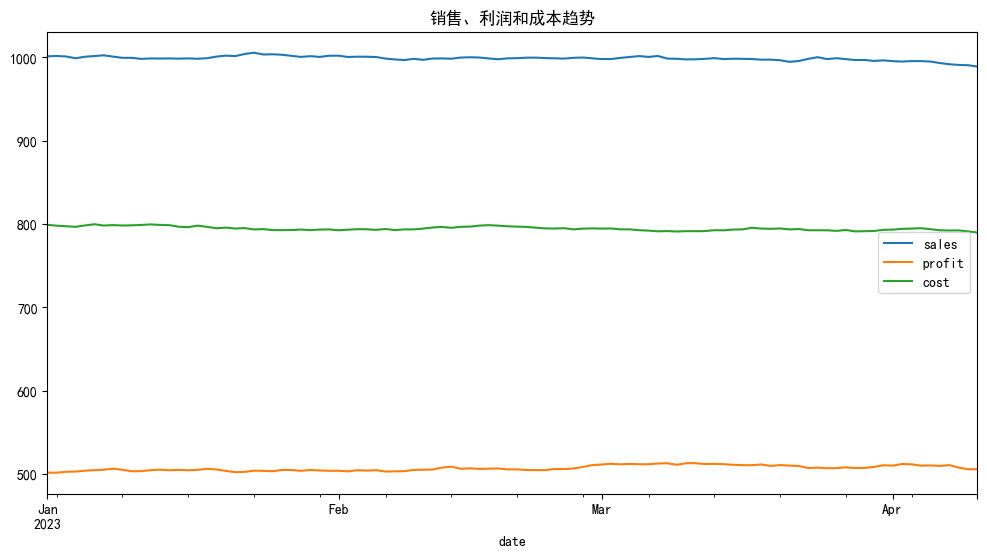

In [ ]:
# 1. 学习基本绘图:df.plot()
print("1. 基本绘图:")
# 简单线图
ax1 = data[['sales', 'profit', 'cost']].plot(title='销售、利润和成本趋势', figsize=(12, 6))
plt.show()

线图 (line)：


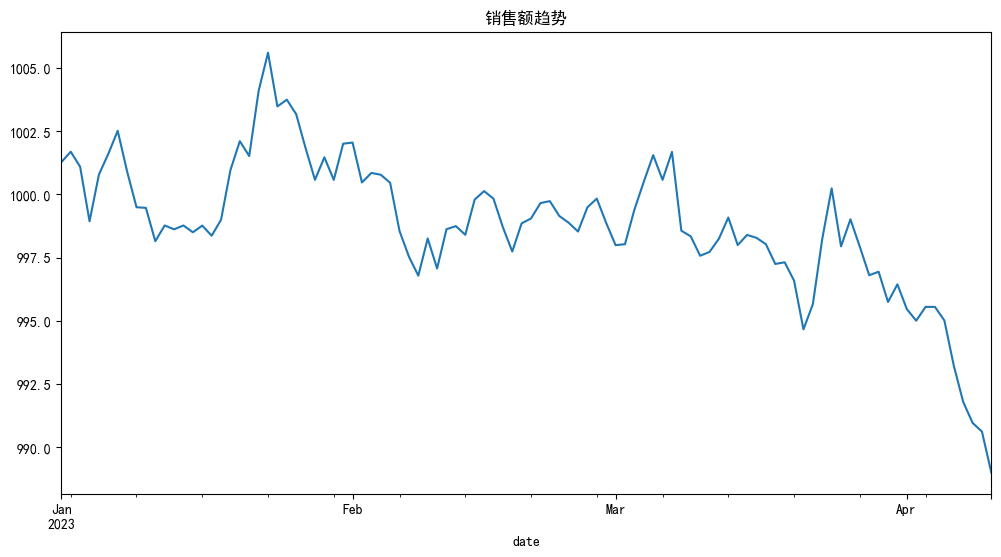

In [ ]:
# 2. 掌握不同图表类型:line, bar, hist, scatter, box
# 线图
print("线图 (line):")
data['sales'].plot(kind='line', title='销售额趋势', figsize=(12, 6))
plt.show()


柱状图 (bar)：


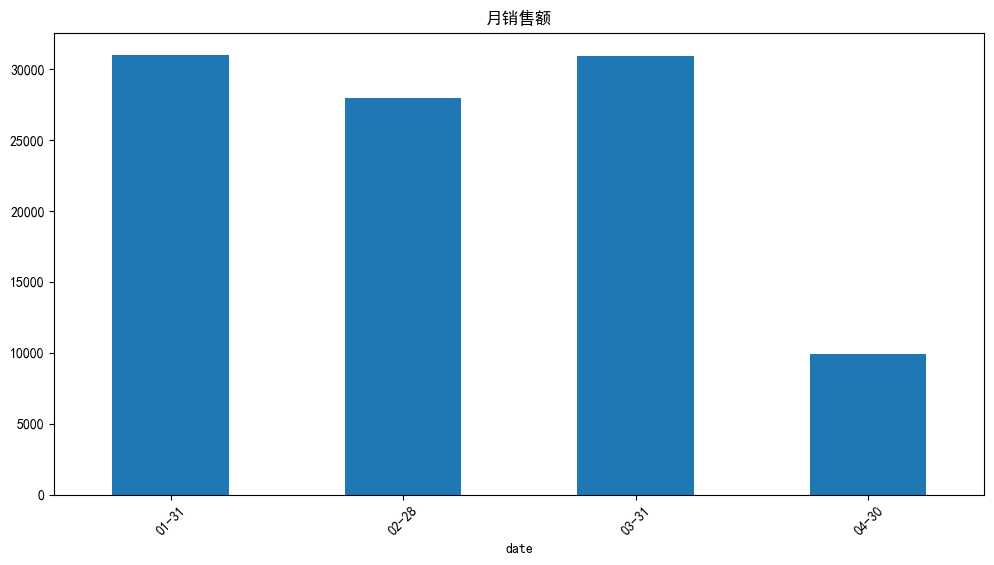

In [ ]:
# 柱状图
print("柱状图 (bar):")
monthly_sales = data['sales'].resample('ME').sum()
monthly_sales.plot(kind='bar', title='月销售额', figsize=(12, 6))
plt.xticks(ticks=range(len(monthly_sales.index)), labels=monthly_sales.index.strftime('%m-%d'), rotation=45)
plt.show()


直方图 (hist)：


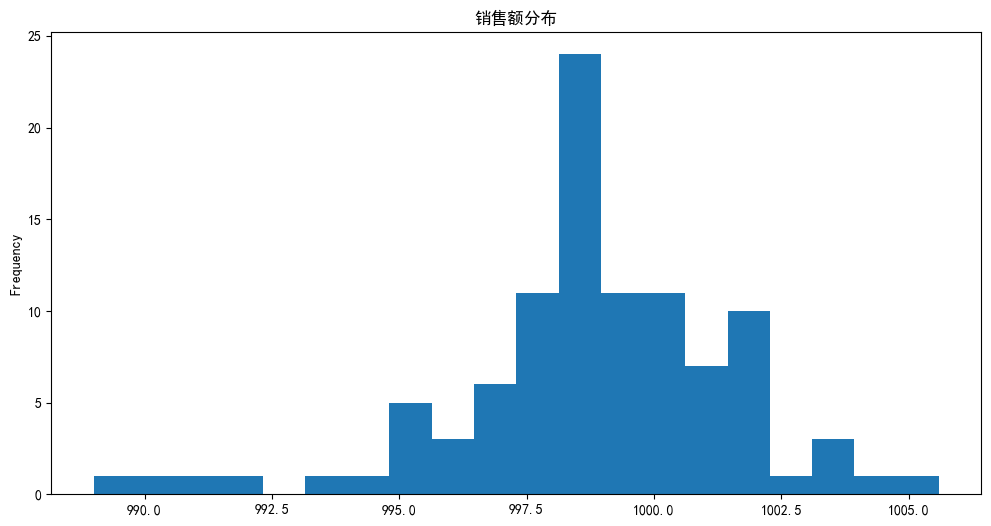

In [ ]:
# 直方图
print("直方图 (hist):")
data['sales'].plot(kind='hist', bins=20, title='销售额分布', figsize=(12, 6))
plt.show()

散点图 (scatter)：


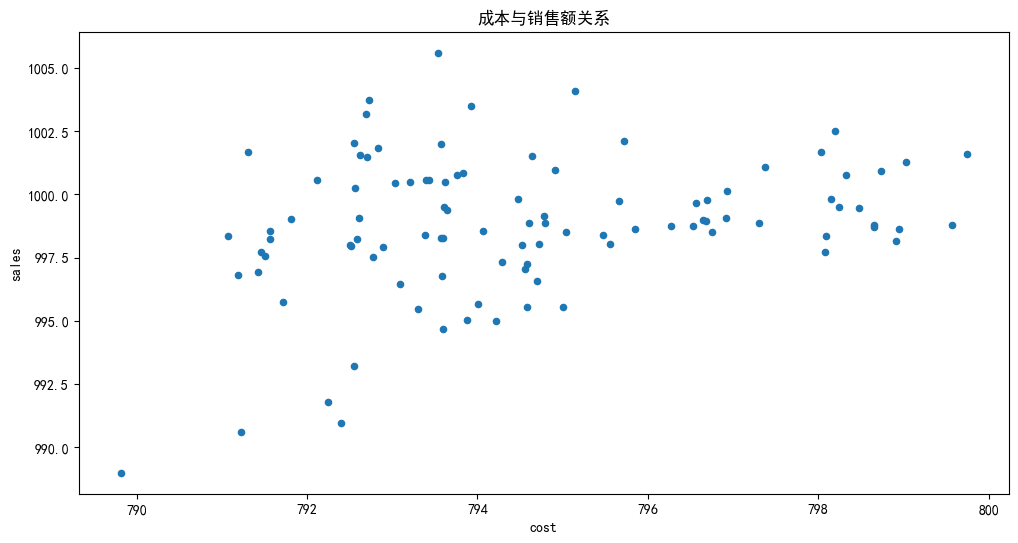

In [ ]:
# 散点图
print("散点图 (scatter):")
data.plot(x='cost', y='sales', kind='scatter', title='成本与销售额关系', figsize=(12, 6))
plt.show()

箱线图 (box)：


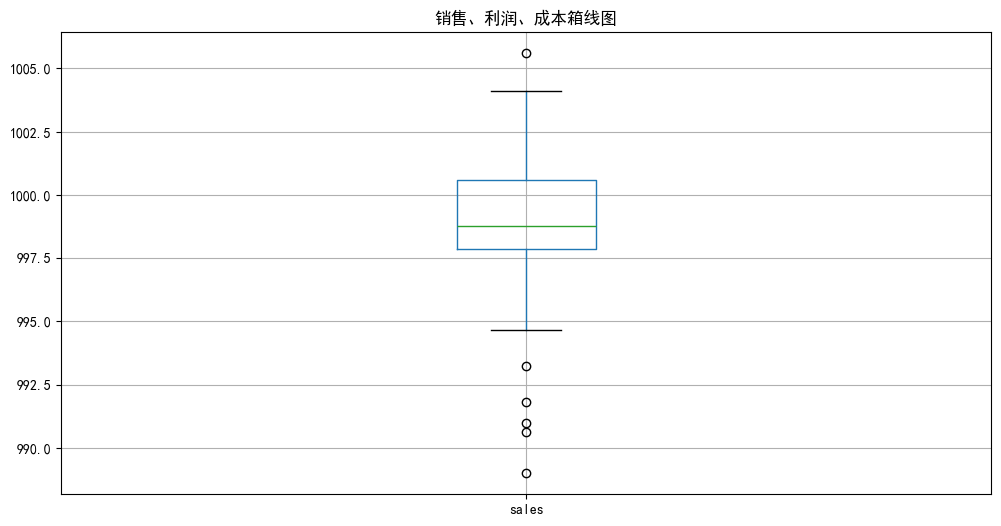

In [ ]:
#  箱线图
print("箱线图 (box):")
data.boxplot(column=['sales'], figsize=(12, 6))
plt.title('销售、利润、成本箱线图')
plt.show()

饼图：


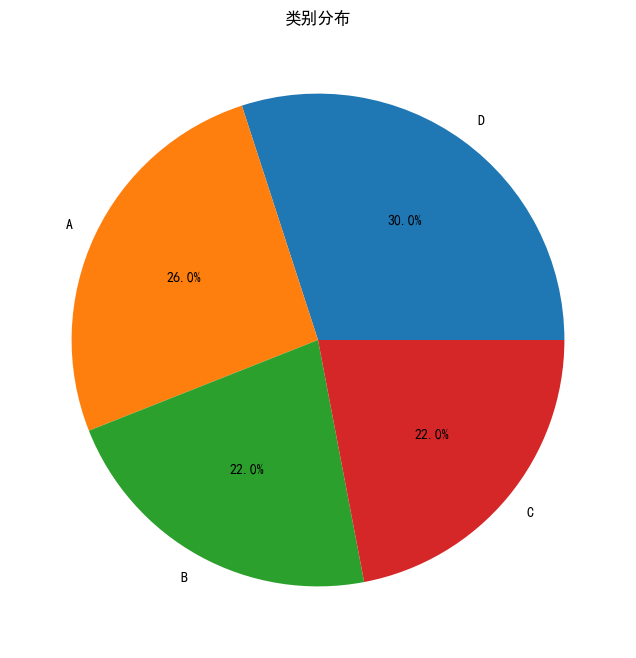

In [ ]:
# 饼图
print("饼图:")
category_counts = data['category'].value_counts()
category_counts.plot(kind='pie', title='类别分布', figsize=(8, 8), autopct='%1.1f%%')
plt.ylabel('')
plt.show()

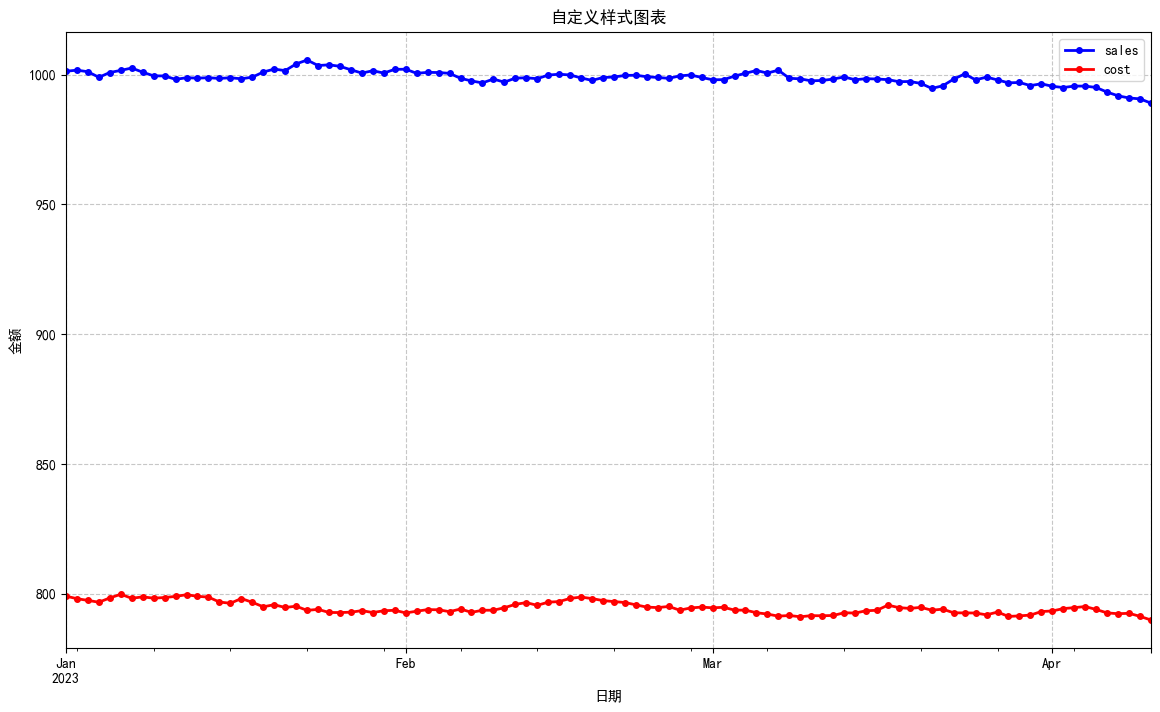

In [169]:
# 3. 自定义图表样式和参数
# 自定义线图
ax = data[['sales', 'cost']].plot(
    title='自定义样式图表',
    figsize=(14, 8),
    color=['blue', 'red'],
    linestyle='-',  # 线型
    marker='o',     # 标记点
    markersize=4,   # 标记点大小
    linewidth=2     # 线宽
)
ax.set_xlabel('日期')
ax.set_ylabel('金额')
ax.grid(True, linestyle='--', alpha=0.7)  # 添加网格
plt.show()

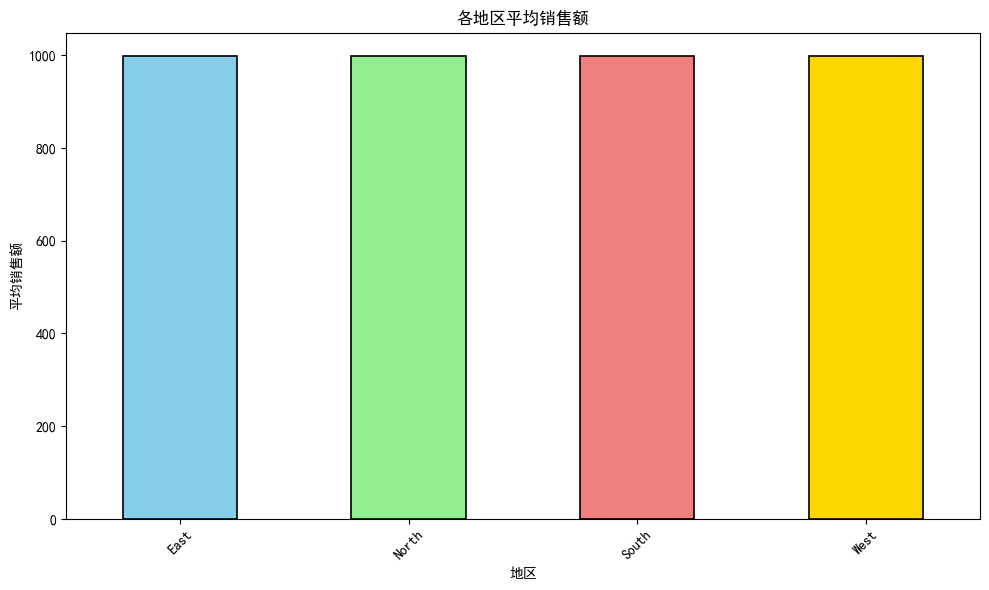

In [170]:
# 自定义柱状图
region_sales = data.groupby('region')['sales'].mean()
ax = region_sales.plot(
    kind='bar',
    title='各地区平均销售额',
    color=['skyblue', 'lightgreen', 'lightcoral', 'gold'],
    figsize=(10, 6),
    edgecolor='black',  # 边框颜色
    linewidth=1.2      # 边框宽度
)
ax.set_xlabel('地区')
ax.set_ylabel('平均销售额')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

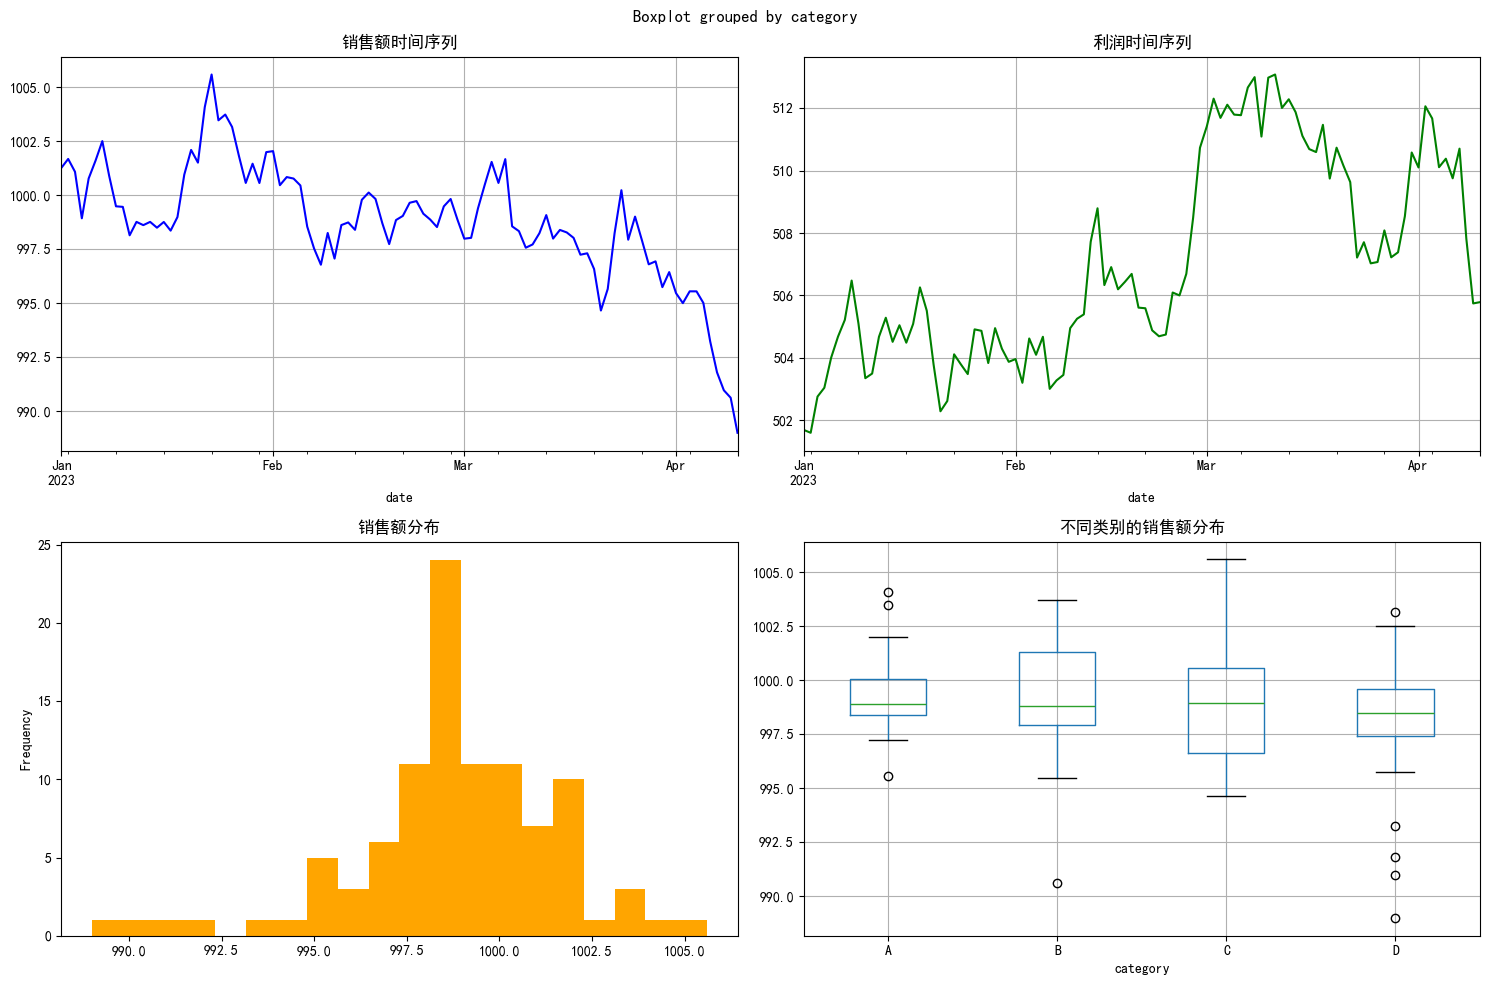

In [ ]:
# 4. 多子图绘制:subplots
# 使用subplots参数创建多个子图
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 子图1:销售额时间序列
data['sales'].plot(ax=axes[0,0], title='销售额时间序列', color='blue')
axes[0,0].grid(True)

# 子图2:利润时间序列
data['profit'].plot(ax=axes[0,1], title='利润时间序列', color='green')
axes[0,1].grid(True)

# 子图3:销售额分布直方图
data['sales'].plot(kind='hist', ax=axes[1,0], title='销售额分布', bins=20, color='orange')

# 子图4:类别销售额箱线图
data.boxplot(column='sales', by='category', ax=axes[1,1])
axes[1,1].set_title('不同类别的销售额分布')

plt.tight_layout()
plt.show()

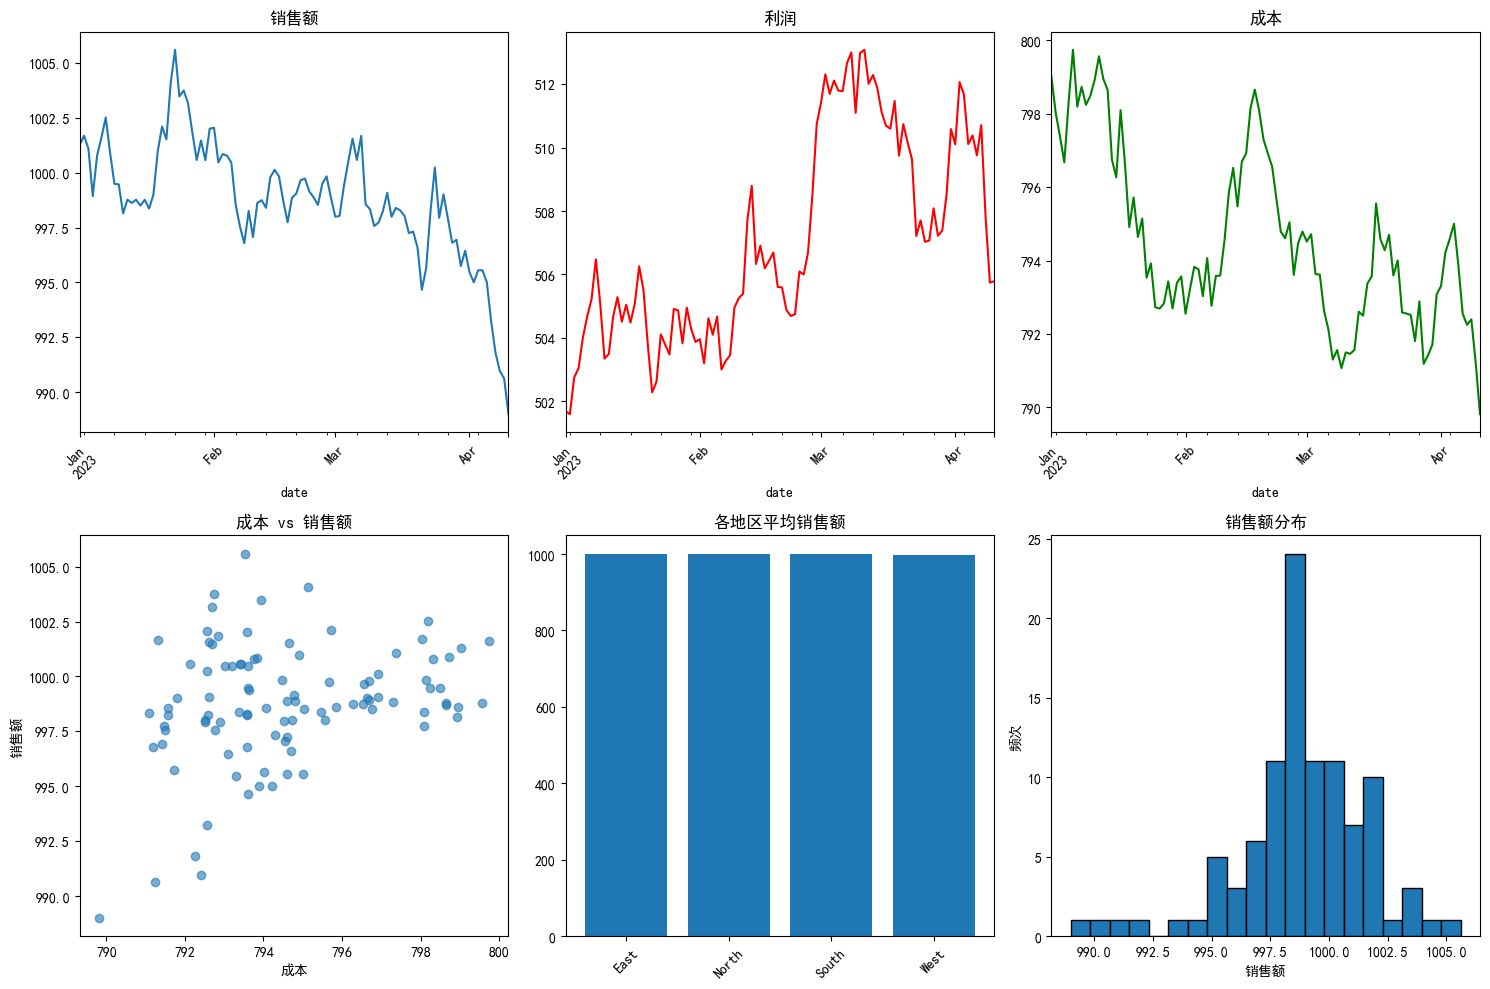

In [172]:
# 使用plt.subplot()手动创建子图
fig = plt.figure(figsize=(15, 10))

# 第一个子图
plt.subplot(2, 3, 1)
data['sales'].plot(kind='line', title='销售额')
plt.xticks(rotation=45)

# 第二个子图
plt.subplot(2, 3, 2)
data['profit'].plot(kind='line', title='利润', color='red')
plt.xticks(rotation=45)

# 第三个子图
plt.subplot(2, 3, 3)
data['cost'].plot(kind='line', title='成本', color='green')
plt.xticks(rotation=45)

# 第四个子图 - 散点图
plt.subplot(2, 3, 4)
plt.scatter(data['cost'], data['sales'], alpha=0.6)
plt.title('成本 vs 销售额')
plt.xlabel('成本')
plt.ylabel('销售额')

# 第五个子图 - 柱状图
plt.subplot(2, 3, 5)
region_avg = data.groupby('region')['sales'].mean()
plt.bar(region_avg.index, region_avg.values)
plt.title('各地区平均销售额')
plt.xticks(rotation=45)

# 第六个子图 - 直方图
plt.subplot(2, 3, 6)
plt.hist(data['sales'], bins=20, edgecolor='black')
plt.title('销售额分布')
plt.xlabel('销售额')
plt.ylabel('频次')

plt.tight_layout()
plt.show()


5. 结合 matplotlib 进行高级可视化：


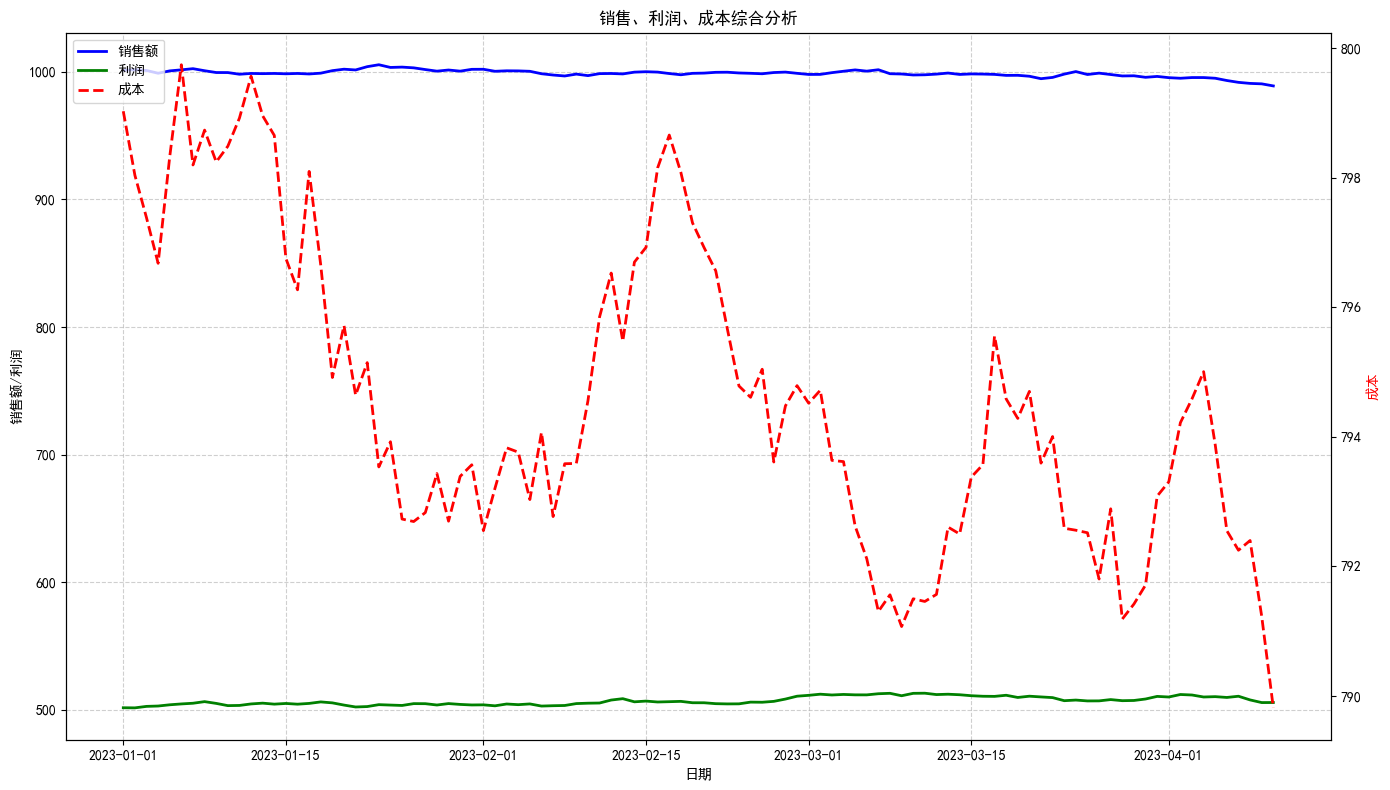

In [ ]:
# 5. 结合 matplotlib 进行高级可视化
print("5. 结合 matplotlib 进行高级可视化:")

# 创建更复杂的图表
fig, ax = plt.subplots(figsize=(14, 8))

# 绘制主要数据
ax.plot(data.index, data['sales'], label='销售额', color='blue', linewidth=2)
ax.plot(data.index, data['profit'], label='利润', color='green', linewidth=2)

# 创建第二个y轴
ax2 = ax.twinx()
ax2.plot(data.index, data['cost'], label='成本', color='red', linewidth=2, linestyle='--')

# 设置标签和标题
ax.set_xlabel('日期')
ax.set_ylabel('销售额/利润', color='black')
ax2.set_ylabel('成本', color='red')
ax.set_title('销售、利润、成本综合分析')

# 添加图例
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 添加网格
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


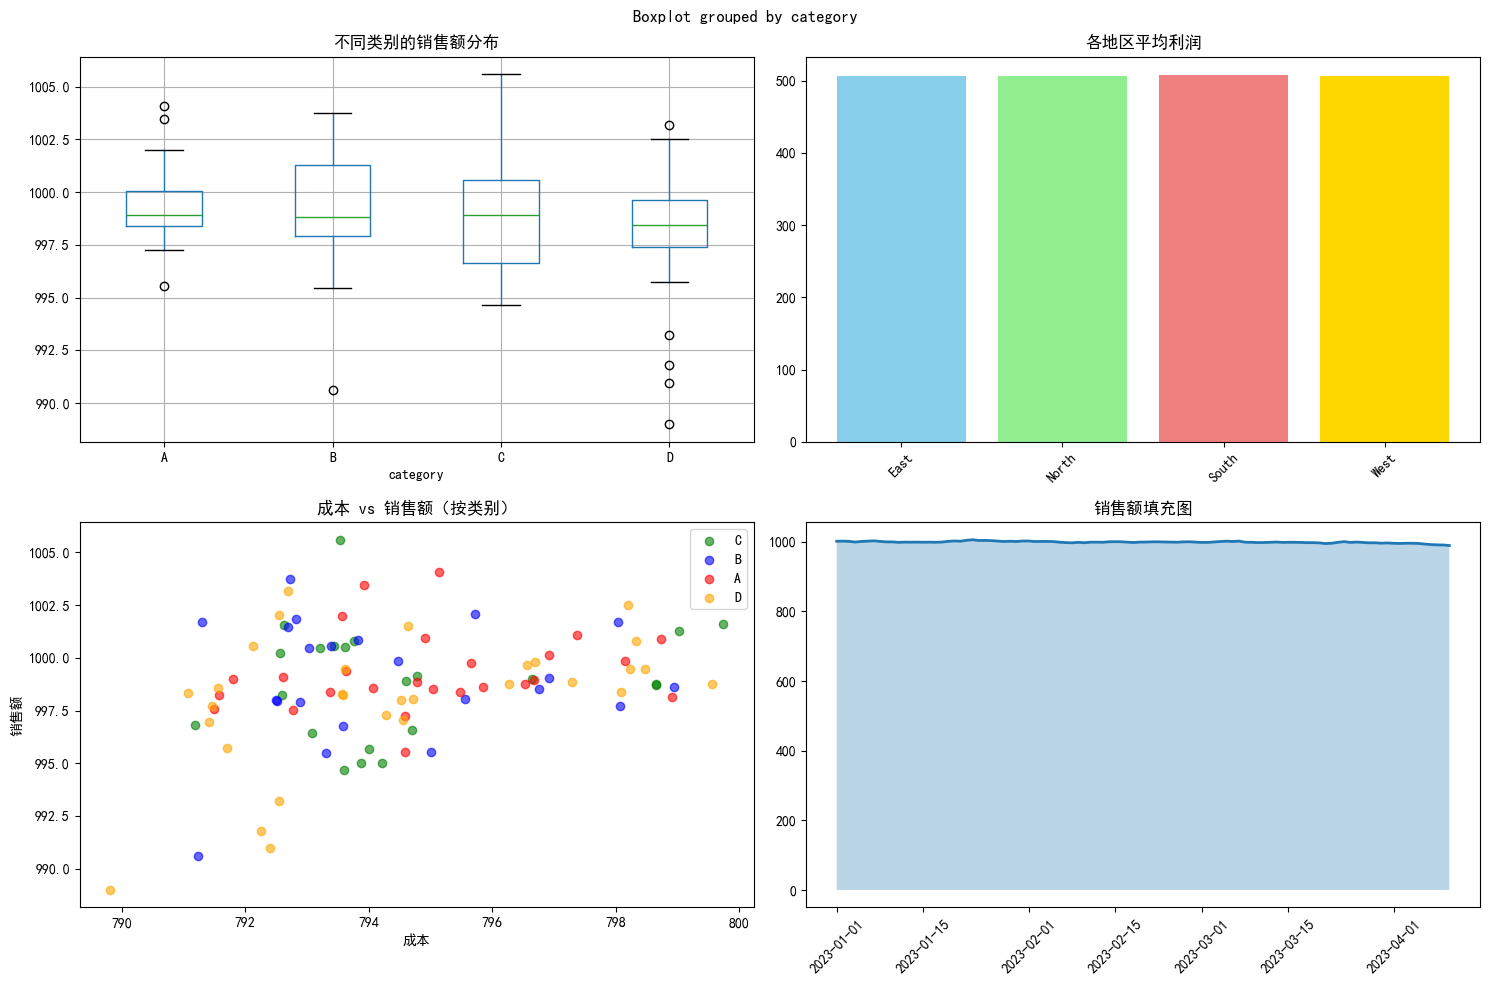

In [ ]:
# 分组数据可视化
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 按类别分组的销售额箱线图
data.boxplot(column='sales', by='category', ax=axes[0,0])
axes[0,0].set_title('不同类别的销售额分布')

# 按地区分组的利润柱状图
region_profit = data.groupby('region')['profit'].mean()
axes[0,1].bar(region_profit.index, region_profit.values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
axes[0,1].set_title('各地区平均利润')
axes[0,1].tick_params(axis='x', rotation=45)

# 成本与销售额的散点图，按类别着色
colors = {'A': 'red', 'B': 'blue', 'C': 'green', 'D': 'orange'}
for category in data['category'].unique():
    mask = data['category'] == category
    axes[1,0].scatter(data.loc[mask, 'cost'], data.loc[mask, 'sales'], 
                     label=category, alpha=0.6, c=colors[category])
axes[1,0].set_xlabel('成本')
axes[1,0].set_ylabel('销售额')
axes[1,0].set_title('成本 vs 销售额(按类别)')
axes[1,0].legend()

# 时间序列的填充图
axes[1,1].fill_between(data.index, data['sales'], alpha=0.3, label='销售额')
axes[1,1].plot(data.index, data['sales'], linewidth=2)
axes[1,1].set_title('销售额填充图')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

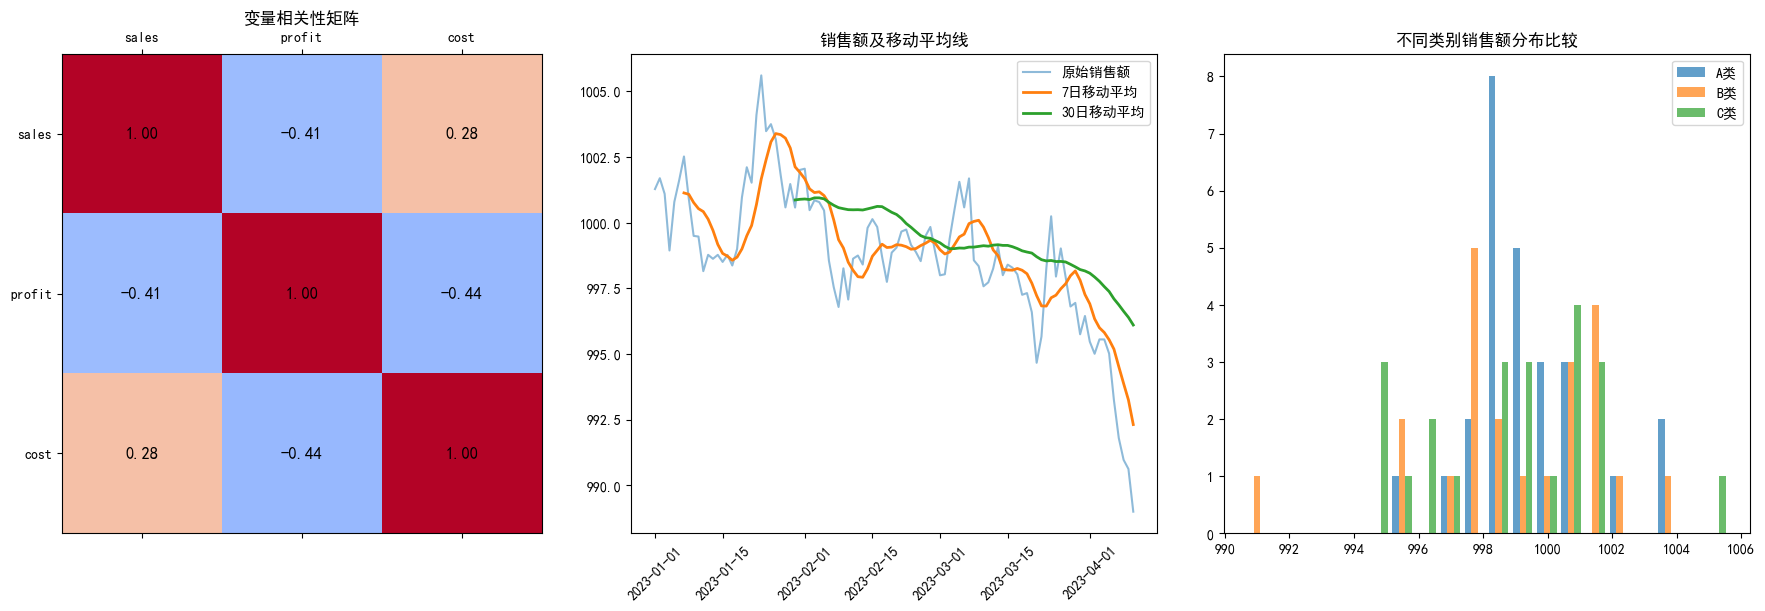

In [ ]:
# 高级统计可视化
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 相关性热力图(使用seaborn风格的概念)
correlation_matrix = data[['sales', 'profit', 'cost']].corr()
im = axes[0].matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
axes[0].set_xticks(range(len(correlation_matrix.columns)))
axes[0].set_yticks(range(len(correlation_matrix.columns)))
axes[0].set_xticklabels(correlation_matrix.columns)
axes[0].set_yticklabels(correlation_matrix.columns)
axes[0].set_title('变量相关性矩阵')
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        axes[0].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                    ha='center', va='center', fontsize=12)

# 移动平均线
data['sales_ma7'] = data['sales'].rolling(window=7).mean()
data['sales_ma30'] = data['sales'].rolling(window=30).mean()
axes[1].plot(data.index, data['sales'], label='原始销售额', alpha=0.5)
axes[1].plot(data.index, data['sales_ma7'], label='7日移动平均', linewidth=2)
axes[1].plot(data.index, data['sales_ma30'], label='30日移动平均', linewidth=2)
axes[1].set_title('销售额及移动平均线')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# 分布比较
axes[2].hist([data[data['category'] == 'A']['sales'], 
              data[data['category'] == 'B']['sales'], 
              data[data['category'] == 'C']['sales']], 
             bins=20, label=['A类', 'B类', 'C类'], alpha=0.7)
axes[2].set_title('不同类别销售额分布比较')
axes[2].legend()

plt.tight_layout()
plt.show()

## 任务9:高级操作与性能优化

学习目标:掌握 Pandas 的高级功能和性能优化技巧

In [178]:
import pandas as pd
import numpy as np

# 创建示例数据
data = {
    'date': pd.date_range('2023-01-01', periods=100),
    'product': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'region': np.random.choice(['North', 'South', 'East', 'West'], 100),
    'sales': np.random.randint(100, 1000, 100),
    'profit': np.random.randint(10, 100, 100),
    'quantity': np.random.randint(1, 50, 100),
    'customer_type': np.random.choice(['New', 'Returning'], 100)
}

df = pd.DataFrame(data)
print("原始数据:")
print(df.head())
print("\n数据信息:")
print(df.info())
print("\n" + "="*60)


原始数据:
        date product region  sales  profit  quantity customer_type
0 2023-01-01       A  South    500      40        40     Returning
1 2023-01-02       B   East    847      88        14           New
2 2023-01-03       A   West    624      40        46     Returning
3 2023-01-04       B   East    842      49        10           New
4 2023-01-05       A  South    516      46        43     Returning

数据信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           100 non-null    datetime64[ns]
 1   product        100 non-null    object        
 2   region         100 non-null    object        
 3   sales          100 non-null    int32         
 4   profit         100 non-null    int32         
 5   quantity       100 non-null    int32         
 6   customer_type  100 non-null    object        
dtypes: datetime64[ns](

In [ ]:
# 1. 学习 pivot_table 和交叉表
print("1. pivot_table 和交叉表:")
print("基本透视表 - 按产品和地区汇总销售额:")
pivot_basic = pd.pivot_table(df, values='sales', index='product', columns='region', aggfunc='sum')
print(pivot_basic)

print("\n透视表 - 多个聚合函数:")
pivot_multi = pd.pivot_table(df, values='sales', index='product', columns='region', 
                            aggfunc=['sum', 'mean', 'count'])
print(pivot_multi)

print("\n透视表 - 多个值列:")
pivot_multi_values = pd.pivot_table(df, values=['sales', 'profit'], index='product', 
                                   columns='region', aggfunc='sum')
print(pivot_multi_values)

print("\n透视表 - 添加margins:")
pivot_margins = pd.pivot_table(df, values='sales', index='product', columns='region', 
                              aggfunc='sum', margins=True, margins_name='Total')
print(pivot_margins)

print("\n交叉表 - 产品和客户类型:")
crosstab = pd.crosstab(df['product'], df['customer_type'], margins=True)
print(crosstab)

print("\n交叉表 - 添加值和聚合函数:")
crosstab_values = pd.crosstab(df['product'], df['customer_type'], 
                             values=df['sales'], aggfunc='mean', margins=True)
print(crosstab_values)


1. pivot_table 和交叉表:
基本透视表 - 按产品和地区汇总销售额:
region   East  North  South  West
product                          
A        1373   4007   5380  7371
B        3122   4031   2071  2627
C        1996   3252   3931  4803
D         951   3252   4562  4929

透视表 - 多个聚合函数:
          sum                          mean                          \
region   East North South  West        East       North       South   
product                                                               
A        1373  4007  5380  7371  457.666667  572.428571  597.777778   
B        3122  4031  2071  2627  520.333333  575.857143  517.750000   
C        1996  3252  3931  4803  499.000000  650.400000  655.166667   
D         951  3252  4562  4929  475.500000  542.000000  570.250000   

                    count                   
region         West  East North South West  
product                                     
A        670.090909     3     7     9   11  
B        525.400000     6     7     4    5  
C        686.142

In [186]:
# 2. 掌握多级索引操作
print("2. 多级索引操作:")
print("创建多级索引数据框:")
df_multi = df.set_index(['product', 'region'])
print(df_multi.head(10))

print("\n多级索引数据框信息:")
print(df_multi.index)

print("\n选择特定层级的数据:")
print("选择所有A产品的数据:")
print(df_multi.loc['A'])

print("\n选择A产品中North地区的数据:")
print(df_multi.sort_index().loc['A', 'North'])

print("\n使用xs方法选择:")
print("选择所有North地区数据:")
print(df_multi.xs('North', level='region'))

print("\n选择A产品中所有地区的销售额:")
print(df_multi.xs('A', level='product')['sales'])

print("\n重置索引:")
df_reset = df_multi.reset_index()
print(df_reset.head())

print("\n交换索引层级:")
df_swapped = df_multi.swaplevel()
print(df_swapped.head())

print("\n按层级排序:")
df_sorted = df_multi.sort_index(level=['region', 'product'])
print(df_sorted.head(10))
print("\n" + "="*60)


2. 多级索引操作:
创建多级索引数据框:
                     date  sales  profit  quantity customer_type
product region                                                  
A       South  2023-01-01    500      40        40     Returning
B       East   2023-01-02    847      88        14           New
A       West   2023-01-03    624      40        46     Returning
B       East   2023-01-04    842      49        10           New
A       South  2023-01-05    516      46        43     Returning
C       South  2023-01-06    657      31        37     Returning
A       North  2023-01-07    451      79         7     Returning
        North  2023-01-08    652      29        13     Returning
D       South  2023-01-09    707      32        21     Returning
        North  2023-01-10    875      53        15           New

多级索引数据框信息:
MultiIndex([('A', 'South'),
            ('B',  'East'),
            ('A',  'West'),
            ('B',  'East'),
            ('A', 'South'),
            ('C', 'South'),
            ('A', 

In [187]:
# 3. 学习向量化操作提高性能
print("3. 向量化操作:")
print("创建数值数据进行演示:")
numeric_df = pd.DataFrame({
    'A': np.random.randn(1000000),
    'B': np.random.randn(1000000),
    'C': np.random.randn(1000000)
})

print("向量化操作 vs 循环操作性能对比:")
import time

# 向量化操作
start_time = time.time()
result_vectorized = numeric_df['A'] * numeric_df['B'] + numeric_df['C']
vectorized_time = time.time() - start_time
print(f"向量化操作耗时: {vectorized_time:.4f}秒")

# 使用循环操作(不推荐，仅作对比)
start_time = time.time()
result_loop = pd.Series(index=numeric_df.index, dtype=float)
for idx in numeric_df.index:
    result_loop[idx] = numeric_df.loc[idx, 'A'] * numeric_df.loc[idx, 'B'] + numeric_df.loc[idx, 'C']
loop_time = time.time() - start_time
print(f"循环操作耗时: {loop_time:.4f}秒")
print(f"向量化操作快 {loop_time/vectorized_time:.2f} 倍")

print("\n常用向量化操作:")
# 字符串向量化操作
df['sales_category'] = np.where(df['sales'] > df['sales'].median(), 'High', 'Low')
print("使用向量化条件操作创建销售类别:")
print(df['sales_category'].value_counts())

# 数学函数向量化
df['profit_margin'] = df['profit'] / df['sales']
df['log_sales'] = np.log(df['sales'])
print("\n向量化数学运算:")
print(df[['sales', 'profit', 'profit_margin', 'log_sales']].head())

print("\n" + "="*60)


3. 向量化操作:
创建数值数据进行演示:
向量化操作 vs 循环操作性能对比:
向量化操作耗时: 0.0040秒
循环操作耗时: 15.4541秒
向量化操作快 3863.34 倍

常用向量化操作:
使用向量化条件操作创建销售类别:
sales_category
Low     50
High    50
Name: count, dtype: int64

向量化数学运算:
   sales  profit  profit_margin  log_sales
0    500      40       0.080000   6.214608
1    847      88       0.103896   6.741701
2    624      40       0.064103   6.436150
3    842      49       0.058195   6.735780
4    516      46       0.089147   6.246107



In [ ]:
# 4. 使用 apply 和 map 进行自定义操作
print("4. apply 和 map 操作:")
print("对单列使用apply:")
def categorize_sales(sales):
    if sales < 300:
        return 'Low'
    elif sales < 700:
        return 'Medium'
    else:
        return 'High'

df['sales_level'] = df['sales'].apply(categorize_sales)
print(df[['sales', 'sales_level']].head())

print("\n对多列使用apply (axis=1):")
def calculate_performance(row):
    return row['profit'] / row['sales'] * 100

df['performance_pct'] = df.apply(calculate_performance, axis=1)
print(df[['sales', 'profit', 'performance_pct']].head())

print("\n使用map进行值映射:")
region_mapping = {'North': '北方', 'South': '南方', 'East': '东方', 'West': '西方'}
df['region_cn'] = df['region'].map(region_mapping)
print(df[['region', 'region_cn']].head())

print("\n使用map对整个数据框操作:")
numeric_subset = df[['sales', 'profit', 'quantity']].head()
print("原始数值子集:")
print(numeric_subset)
print("\n应用函数到所有数值:")
numeric_applied = numeric_subset.map(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)
print(numeric_applied)

print("\n分组后使用apply:")
grouped_result = df.groupby('product').apply(lambda x: x['sales'].sum() / x['quantity'].sum(), include_groups=False)
print("每种产品的平均单价:")
print(grouped_result)
print("\n" + "="*60)


4. apply 和 map 操作:
对单列使用apply:
   sales sales_level
0    500      Medium
1    847        High
2    624      Medium
3    842        High
4    516      Medium

对多列使用apply (axis=1):
   sales  profit  performance_pct
0    500      40         8.000000
1    847      88        10.389610
2    624      40         6.410256
3    842      49         5.819477
4    516      46         8.914729

使用map进行值映射:
  region region_cn
0  South        南方
1   East        东方
2   West        西方
3   East        东方
4  South        南方

使用applymap对整个数据框操作:
原始数值子集:
   sales  profit  quantity
0    500      40        40
1    847      88        14
2    624      40        46
3    842      49        10
4    516      46        43

应用函数到所有数值:
    sales profit quantity
0  500.00  40.00    40.00
1  847.00  88.00    14.00
2  624.00  40.00    46.00
3  842.00  49.00    10.00
4  516.00  46.00    43.00

分组后使用apply:
每种产品的平均单价:
product
A    22.806289
B    22.192884
C    28.828866
D    29.576674
dtype: float64



In [191]:
# 5. 内存优化技巧和数据类型选择
print("5. 内存优化技巧和数据类型选择:")
print("原始数据框内存使用情况:")
print(df.info(memory_usage='deep'))

print("\n数据类型优化示例:")
# 显示当前数据类型
print("当前数据类型:")
print(df.dtypes)

# 优化字符串列为category类型(当唯一值较少时)
print("\n将低基数字符串列转换为category类型:")
df_optimized = df.copy()
df_optimized['product'] = df_optimized['product'].astype('category')
df_optimized['region'] = df_optimized['region'].astype('category')
df_optimized['customer_type'] = df_optimized['customer_type'].astype('category')
df_optimized['sales_level'] = df_optimized['sales_level'].astype('category')
df_optimized['region_cn'] = df_optimized['region_cn'].astype('category')

print("优化后的数据类型:")
print(df_optimized.dtypes)

print("\n内存使用对比:")
original_memory = df.memory_usage(deep=True).sum()
optimized_memory = df_optimized.memory_usage(deep=True).sum()
print(f"原始内存使用: {original_memory} bytes")
print(f"优化后内存使用: {optimized_memory} bytes")
print(f"内存节省: {((original_memory - optimized_memory) / original_memory) * 100:.2f}%")

print("\n数值类型优化:")
# 对于整数，选择合适的类型
print("整数列的范围分析:")
for col in ['sales', 'profit', 'quantity']:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}, dtype={df[col].dtype}")

# 优化整数类型
df_optimized['sales'] = pd.to_numeric(df_optimized['sales'], downcast='integer')
df_optimized['profit'] = pd.to_numeric(df_optimized['profit'], downcast='integer')
df_optimized['quantity'] = pd.to_numeric(df_optimized['quantity'], downcast='integer')

print("\n优化后的数据类型:")
print(df_optimized.dtypes)

# 其他内存优化技巧
print("\n其他内存优化技巧:")
print("使用query方法替代布尔索引(在大数据集上更高效):")
high_sales = df.query('sales > 500')
print(f"高销售额记录数: {len(high_sales)}")

print("\n使用eval进行复杂计算(在大数据集上更高效):")
df['calculation'] = df.eval('sales * profit / quantity')
print(df[['sales', 'profit', 'quantity', 'calculation']].head())

print("\n选择性读取列(处理大文件时):")
# 这在读取大文件时特别有用
# pd.read_csv('large_file.csv', usecols=['col1', 'col2', 'col3'])

print("\n使用chunksize处理大文件:")
# 这在处理超出内存的大文件时很有用
# for chunk in pd.read_csv('large_file.csv', chunksize=10000):
#     process(chunk)

print("\n" + "="*60)

# 综合示例:性能优化的实际应用
print("综合示例:性能优化的实际应用")
print("创建一个大型数据集进行优化演示:")
large_data = {
    'category': np.random.choice(['Type_A', 'Type_B', 'Type_C', 'Type_D', 'Type_E'], 100000),
    'value1': np.random.randn(100000),
    'value2': np.random.randint(1, 100, 100000),
    'group': np.random.choice(['Group1', 'Group2', 'Group3'], 100000)
}
large_df = pd.DataFrame(large_data)

print("优化前:")
print(f"内存使用: {large_df.memory_usage(deep=True).sum()} bytes")
print(f"数据类型:\n{large_df.dtypes}")

# 优化
large_df['category'] = large_df['category'].astype('category')
large_df['group'] = large_df['group'].astype('category')
large_df['value2'] = pd.to_numeric(large_df['value2'], downcast='integer')

print("\n优化后:")
print(f"内存使用: {large_df.memory_usage(deep=True).sum()} bytes")
print(f"数据类型:\n{large_df.dtypes}")

print("\n性能优化总结:")
print("- 使用category类型存储低基数字符串")
print("- 选择合适的数据类型(int8, int16, float32等)")
print("- 使用向量化操作而非循环")
print("- 使用query和eval进行复杂计算")
print("- 使用chunksize处理大文件")
print("- 合理使用索引和分块处理")


5. 内存优化技巧和数据类型选择:
原始数据框内存使用情况:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             100 non-null    datetime64[ns]
 1   product          100 non-null    object        
 2   region           100 non-null    object        
 3   sales            100 non-null    int32         
 4   profit           100 non-null    int32         
 5   quantity         100 non-null    int32         
 6   customer_type    100 non-null    object        
 7   sales_category   100 non-null    object        
 8   profit_margin    100 non-null    float64       
 9   log_sales        100 non-null    float64       
 10  sales_level      100 non-null    object        
 11  performance_pct  100 non-null    float64       
 12  region_cn        100 non-null    object        
dtypes: datetime64[ns](1), float64(3), int32(3), object(6)
memory usag